In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/submisisons/sem 8/ml/Enron/emails.csv"
! pip install nxviz
! pip install networkx

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Librairies
**We are importing the required libraries for analysis of the emails**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", path]).decode("utf8"))

# Any results you write to the current directory are saved as output.

/content/drive/My Drive/submisisons/sem 8/ml/Enron/emails.csv



#Data Extraction from CSV
we are reading data from CSV file in a Pandas DataFrame


In [ ]:
pd.options.mode.chained_assignment = None

# chunk = pd.read_csv(path, chunksize=500)
# data = next(chunk)
data = pd.read_csv(path)  

data.info()
print(data.message[2])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 2 columns):
file       517401 non-null object
message    517401 non-null object
dtypes: object(2)
memory usage: 7.9+ MB
Message-ID: <24216240.1075855687451.JavaMail.evans@thyme>
Date: Wed, 18 Oct 2000 03:00:00 -0700 (PDT)
From: phillip.allen@enron.com
To: leah.arsdall@enron.com
Subject: Re: test
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Leah Van Arsdall
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

test successful.  way to go!!!


# Functions to extract information from mails
 

In [ ]:
from tqdm import tqdm
def get_text(Series, row_num_slicer):
    """returns a Series with text sliced from a list split from each message. Row_num_slicer
    tells function where to slice split text to find only the body of the message."""
    result = pd.Series(index=Series.index)
    for row, message in tqdm(enumerate(Series)):
        message_words = message.split('\n')
        del message_words[:row_num_slicer]
        result.iloc[row] = message_words
    return result

def get_row(Series, row_num):
    """returns a single row split out from each message. Row_num is the index of the specific
    row that you want the function to return."""
    result = pd.Series(index=Series.index)
    for row, message in tqdm(enumerate(Series)):
        message_words = message.split('\n')
        message_words = message_words[row_num]
        result.iloc[row] = message_words
    return result

def get_address(df, Series, num_cols=1):
    """returns a specified email address from each row in a Series"""
    address = re.compile('[\w\.-]+@[\w\.-]+\.\w+')
    addresses = []
    result1 = pd.Series(index=df.index)
    result2 = pd.Series(index=df.index)
    result3 = pd.Series(index=df.index)
    for i in tqdm(range(len(df))):
        for message in Series:
            try:
              correspondents = re.findall(address, message)
              addresses.append(correspondents)
              result1[i] = addresses[i][0]
            except:
              continue
        if num_cols >= 2:
            if len(addresses[i]) >= 3:
                result2[i] = addresses[i][1]
                if num_cols == 3:
                    if len(addresses[i]) >= 4:
                        result3[i] = addresses[i][2]
    return result1, result2, result3

def standard_format(df, Series, string, slicer):
    """Drops rows containing messages without some specified value in the expected locations. 
    Returns original dataframe without these values. Don't forget to reindex after doing this!!!"""
    rows = []
    for row, message in enumerate(Series):
        message_words = message.split('\n')
        if string not in message_words[slicer]:
            rows.append(row)
    df = df.drop(df.index[rows])
    return df

# Cleaning or removing Mails that are not in a proper structure 

In [ ]:
x = len(data.index)
headers = ['Message-ID: ', 'Date: ', 'From: ', 'To: ', 'Subject: ']
for i, v in enumerate(headers):
    data = standard_format(data, data.message, v, i)
data = data.reset_index()
print("Got rid of {} useless emails! That's {}% of the total number of messages in this dataset.".format(x - len(data.index), np.round(((x - len(data.index)) / x) * 100, decimals=2)))

Got rid of 111433 useless emails! That's 21.54% of the total number of messages in this dataset.


# The below are the information extractions from the mail message body

In [ ]:
data['text'] = get_text(data.message, 15)
data.to_csv (r'/content/drive/My Drive/submisisons/sem 8/ml/Enron/data.csv', index = False, header=True)

405968it [1:06:27, 101.81it/s]


In [ ]:
data = pd.read_csv('/content/drive/My Drive/submisisons/sem 8/ml/Enron/data.csv') 
data['date'] = get_row(data.message, 1)
data.to_csv (r'/content/drive/My Drive/submisisons/sem 8/ml/Enron/data1.csv', index = False, header=True)

405968it [1:03:03, 107.30it/s]


In [ ]:
data = pd.read_csv('/content/drive/My Drive/submisisons/sem 8/ml/Enron/data1.csv') 
data['senders'] = get_row(data.message, 2)
data.to_csv (r'/content/drive/My Drive/submisisons/sem 8/ml/Enron/data2.csv', index = False, header=True)

405968it [1:06:20, 102.00it/s]


In [ ]:
data = pd.read_csv('/content/drive/My Drive/submisisons/sem 8/ml/Enron/data2.csv') 
data['recipients'] = get_row(data.message, 3)
data.to_csv (r'/content/drive/My Drive/submisisons/sem 8/ml/Enron/data3.csv', index = False, header=True)

405968it [1:13:41, 91.81it/s]


In [ ]:
data = pd.read_csv('/content/drive/My Drive/submisisons/sem 8/ml/Enron/data3.csv') 
data['subject'] = get_row(data.message, 4)
data.to_csv (r'/content/drive/My Drive/submisisons/sem 8/ml/Enron/data4.csv', index = False, header=True)

405968it [1:11:26, 94.72it/s]


In [ ]:
# data = pd.read_csv('/content/drive/My Drive/submisisons/sem 8/ml/Enron/data4.csv') 
total_size = 405968
chunk_size = 500
chunk = pd.read_csv('/content/drive/My Drive/submisisons/sem 8/ml/Enron/data4.csv', chunksize=chunk_size)

data = next(chunk)
data.date = data.date.str.replace('Date: ', '')
data.date = pd.to_datetime(data.date)
data.subject = data.subject.str.replace('Subject: ', '')
data['recipient1'], data['recipient2'], data['recipient3'] = get_address(data, data.recipients, num_cols=3)

data.to_csv (r'/content/drive/My Drive/submisisons/sem 8/ml/Enron/data5.csv', index = False, header=True)


for i in range(int((total_size-chunk_size)/chunk_size - 1)):
  print(i)
  data = next(chunk)
  data.date = data.date.str.replace('Date: ', '')
  data.date = pd.to_datetime(data.date)
  data.subject = data.subject.str.replace('Subject: ', '')
  data['recipient1'], data['recipient2'], data['recipient3'] = get_address(data, data.recipients, num_cols=3)

  data.to_csv (r'/content/drive/My Drive/submisisons/sem 8/ml/Enron/data5.csv', index = False, header=False, mode = 'a')

  0%|          | 0/500 [00:00<?, ?it/s]

0


  0%|          | 0/500 [00:00<?, ?it/s]

1


  0%|          | 0/500 [00:00<?, ?it/s]

2


  0%|          | 0/500 [00:00<?, ?it/s]

3


  0%|          | 0/500 [00:00<?, ?it/s]

4


  0%|          | 0/500 [00:00<?, ?it/s]

5


  0%|          | 0/500 [00:00<?, ?it/s]

6


  0%|          | 0/500 [00:00<?, ?it/s]

7


  0%|          | 0/500 [00:00<?, ?it/s]

8


100%|██████████| 500/500 [00:02<00:00, 211.23it/s]


9


  0%|          | 0/500 [00:00<?, ?it/s]

10


  0%|          | 0/500 [00:00<?, ?it/s]

11


  0%|          | 0/500 [00:00<?, ?it/s]

12


  0%|          | 0/500 [00:00<?, ?it/s]

13


100%|██████████| 500/500 [00:02<00:00, 208.41it/s]


14


  0%|          | 0/500 [00:00<?, ?it/s]

15


  0%|          | 0/500 [00:00<?, ?it/s]

16


  0%|          | 0/500 [00:00<?, ?it/s]

17


  5%|▍         | 23/500 [00:00<00:02, 229.36it/s]

18


  0%|          | 0/500 [00:00<?, ?it/s]

19


  0%|          | 0/500 [00:00<?, ?it/s]

20


  0%|          | 0/500 [00:00<?, ?it/s]

21


100%|██████████| 500/500 [00:02<00:00, 212.78it/s]


22


100%|██████████| 500/500 [00:02<00:00, 218.47it/s]


23


  0%|          | 0/500 [00:00<?, ?it/s]

24


  0%|          | 0/500 [00:00<?, ?it/s]

25


  0%|          | 0/500 [00:00<?, ?it/s]

26


  0%|          | 0/500 [00:00<?, ?it/s]

27


  0%|          | 0/500 [00:00<?, ?it/s]

28


  0%|          | 0/500 [00:00<?, ?it/s]

29


  0%|          | 0/500 [00:00<?, ?it/s]

30


  0%|          | 0/500 [00:00<?, ?it/s]

31


  0%|          | 0/500 [00:00<?, ?it/s]

32


  0%|          | 0/500 [00:00<?, ?it/s]

33


  0%|          | 0/500 [00:00<?, ?it/s]

34


  0%|          | 0/500 [00:00<?, ?it/s]

35


  0%|          | 0/500 [00:00<?, ?it/s]

36


  0%|          | 0/500 [00:00<?, ?it/s]

37


  0%|          | 0/500 [00:00<?, ?it/s]

38


  0%|          | 0/500 [00:00<?, ?it/s]

39


  0%|          | 0/500 [00:00<?, ?it/s]

40


  0%|          | 0/500 [00:00<?, ?it/s]

41


  0%|          | 0/500 [00:00<?, ?it/s]

42


  0%|          | 0/500 [00:00<?, ?it/s]

43


  0%|          | 0/500 [00:00<?, ?it/s]

44


  0%|          | 0/500 [00:00<?, ?it/s]

45


  0%|          | 0/500 [00:00<?, ?it/s]

46


  0%|          | 0/500 [00:00<?, ?it/s]

47


  0%|          | 0/500 [00:00<?, ?it/s]

48


  0%|          | 0/500 [00:00<?, ?it/s]

49


  0%|          | 0/500 [00:00<?, ?it/s]

50


  0%|          | 0/500 [00:00<?, ?it/s]

51


  0%|          | 0/500 [00:00<?, ?it/s]

52


  0%|          | 0/500 [00:00<?, ?it/s]

53


  0%|          | 0/500 [00:00<?, ?it/s]

54


  0%|          | 0/500 [00:00<?, ?it/s]

55


  0%|          | 0/500 [00:00<?, ?it/s]

56


  0%|          | 0/500 [00:00<?, ?it/s]

57


  0%|          | 0/500 [00:00<?, ?it/s]

58


  0%|          | 0/500 [00:00<?, ?it/s]

59


  0%|          | 0/500 [00:00<?, ?it/s]

60


  0%|          | 0/500 [00:00<?, ?it/s]

61


  0%|          | 0/500 [00:00<?, ?it/s]

62


  0%|          | 0/500 [00:00<?, ?it/s]

63


  0%|          | 0/500 [00:00<?, ?it/s]

64


  0%|          | 0/500 [00:00<?, ?it/s]

65


  0%|          | 0/500 [00:00<?, ?it/s]

66


  0%|          | 0/500 [00:00<?, ?it/s]

67


  0%|          | 0/500 [00:00<?, ?it/s]

68


  0%|          | 0/500 [00:00<?, ?it/s]

69


  0%|          | 0/500 [00:00<?, ?it/s]

70


  0%|          | 0/500 [00:00<?, ?it/s]

71


  0%|          | 0/500 [00:00<?, ?it/s]

72


  0%|          | 0/500 [00:00<?, ?it/s]

73


  0%|          | 0/500 [00:00<?, ?it/s]

74


  0%|          | 0/500 [00:00<?, ?it/s]

75


  0%|          | 0/500 [00:00<?, ?it/s]

76


  0%|          | 0/500 [00:00<?, ?it/s]

77


  0%|          | 0/500 [00:00<?, ?it/s]

78


  0%|          | 0/500 [00:00<?, ?it/s]

79


  0%|          | 0/500 [00:00<?, ?it/s]

80


100%|██████████| 500/500 [00:02<00:00, 228.28it/s]


81


  0%|          | 0/500 [00:00<?, ?it/s]

82


  0%|          | 0/500 [00:00<?, ?it/s]

83


  0%|          | 0/500 [00:00<?, ?it/s]

84


  0%|          | 0/500 [00:00<?, ?it/s]

85


  0%|          | 0/500 [00:00<?, ?it/s]

86


  0%|          | 0/500 [00:00<?, ?it/s]

87


  0%|          | 0/500 [00:00<?, ?it/s]

88


  0%|          | 0/500 [00:00<?, ?it/s]

89


  0%|          | 0/500 [00:00<?, ?it/s]

90


  0%|          | 0/500 [00:00<?, ?it/s]

91


  0%|          | 0/500 [00:00<?, ?it/s]

92


  0%|          | 0/500 [00:00<?, ?it/s]

93


  0%|          | 0/500 [00:00<?, ?it/s]

94


  0%|          | 0/500 [00:00<?, ?it/s]

95


  0%|          | 0/500 [00:00<?, ?it/s]

96


  0%|          | 0/500 [00:00<?, ?it/s]

97


  0%|          | 0/500 [00:00<?, ?it/s]

98


  0%|          | 0/500 [00:00<?, ?it/s]

99


  0%|          | 0/500 [00:00<?, ?it/s]

100


  0%|          | 0/500 [00:00<?, ?it/s]

101


  0%|          | 0/500 [00:00<?, ?it/s]

102


  0%|          | 0/500 [00:00<?, ?it/s]

103


  0%|          | 0/500 [00:00<?, ?it/s]

104


  0%|          | 0/500 [00:00<?, ?it/s]

105


  0%|          | 0/500 [00:00<?, ?it/s]

106


  0%|          | 0/500 [00:00<?, ?it/s]

107


  0%|          | 0/500 [00:00<?, ?it/s]

108


  0%|          | 0/500 [00:00<?, ?it/s]

109


  0%|          | 0/500 [00:00<?, ?it/s]

110


  0%|          | 0/500 [00:00<?, ?it/s]

111


  0%|          | 0/500 [00:00<?, ?it/s]

112


  0%|          | 0/500 [00:00<?, ?it/s]

113


  0%|          | 0/500 [00:00<?, ?it/s]

114


  0%|          | 0/500 [00:00<?, ?it/s]

115


  0%|          | 0/500 [00:00<?, ?it/s]

116


  0%|          | 0/500 [00:00<?, ?it/s]

117


  0%|          | 0/500 [00:00<?, ?it/s]

118


  0%|          | 0/500 [00:00<?, ?it/s]

119


  0%|          | 0/500 [00:00<?, ?it/s]

120


  0%|          | 0/500 [00:00<?, ?it/s]

121


  0%|          | 0/500 [00:00<?, ?it/s]

122


  0%|          | 0/500 [00:00<?, ?it/s]

123


  0%|          | 0/500 [00:00<?, ?it/s]

124


  0%|          | 0/500 [00:00<?, ?it/s]

125


  0%|          | 0/500 [00:00<?, ?it/s]

126


  0%|          | 0/500 [00:00<?, ?it/s]

127


  0%|          | 0/500 [00:00<?, ?it/s]

128


  0%|          | 0/500 [00:00<?, ?it/s]

129


  0%|          | 0/500 [00:00<?, ?it/s]

130


  0%|          | 0/500 [00:00<?, ?it/s]

131


  0%|          | 0/500 [00:00<?, ?it/s]

132


  0%|          | 0/500 [00:00<?, ?it/s]

133


  0%|          | 0/500 [00:00<?, ?it/s]

134


  0%|          | 0/500 [00:00<?, ?it/s]

135


  0%|          | 0/500 [00:00<?, ?it/s]

136


  0%|          | 0/500 [00:00<?, ?it/s]

137


  0%|          | 0/500 [00:00<?, ?it/s]

138


  0%|          | 0/500 [00:00<?, ?it/s]

139


  0%|          | 0/500 [00:00<?, ?it/s]

140


  0%|          | 0/500 [00:00<?, ?it/s]

141


  0%|          | 0/500 [00:00<?, ?it/s]

142


  0%|          | 0/500 [00:00<?, ?it/s]

143


  0%|          | 0/500 [00:00<?, ?it/s]

144


  0%|          | 0/500 [00:00<?, ?it/s]

145


  0%|          | 0/500 [00:00<?, ?it/s]

146


  0%|          | 0/500 [00:00<?, ?it/s]

147


  0%|          | 0/500 [00:00<?, ?it/s]

148


  0%|          | 0/500 [00:00<?, ?it/s]

149


  5%|▌         | 25/500 [00:00<00:01, 244.30it/s]

150


  0%|          | 0/500 [00:00<?, ?it/s]

151


  0%|          | 0/500 [00:00<?, ?it/s]

152


  0%|          | 0/500 [00:00<?, ?it/s]

153


  0%|          | 0/500 [00:00<?, ?it/s]

154


  0%|          | 0/500 [00:00<?, ?it/s]

155


  0%|          | 0/500 [00:00<?, ?it/s]

156


  0%|          | 0/500 [00:00<?, ?it/s]

157


  0%|          | 0/500 [00:00<?, ?it/s]

158


  0%|          | 0/500 [00:00<?, ?it/s]

159


  0%|          | 0/500 [00:00<?, ?it/s]

160


  0%|          | 0/500 [00:00<?, ?it/s]

161


  0%|          | 0/500 [00:00<?, ?it/s]

162


  0%|          | 0/500 [00:00<?, ?it/s]

163


100%|██████████| 500/500 [00:02<00:00, 223.25it/s]


164


  0%|          | 0/500 [00:00<?, ?it/s]

165


  0%|          | 0/500 [00:00<?, ?it/s]

166


  0%|          | 0/500 [00:00<?, ?it/s]

167


  0%|          | 0/500 [00:00<?, ?it/s]

168


  0%|          | 0/500 [00:00<?, ?it/s]

169


  0%|          | 0/500 [00:00<?, ?it/s]

170


  0%|          | 0/500 [00:00<?, ?it/s]

171


  0%|          | 0/500 [00:00<?, ?it/s]

172


  0%|          | 0/500 [00:00<?, ?it/s]

173


  0%|          | 0/500 [00:00<?, ?it/s]

174


  0%|          | 0/500 [00:00<?, ?it/s]

175


  0%|          | 0/500 [00:00<?, ?it/s]

176


  0%|          | 0/500 [00:00<?, ?it/s]

177


  0%|          | 0/500 [00:00<?, ?it/s]

178


  0%|          | 0/500 [00:00<?, ?it/s]

179


  0%|          | 0/500 [00:00<?, ?it/s]

180


  0%|          | 0/500 [00:00<?, ?it/s]

181


  0%|          | 0/500 [00:00<?, ?it/s]

182


  5%|▍         | 24/500 [00:00<00:02, 236.65it/s]

183


  0%|          | 0/500 [00:00<?, ?it/s]

184


  0%|          | 0/500 [00:00<?, ?it/s]

185


  0%|          | 0/500 [00:00<?, ?it/s]

186


  0%|          | 0/500 [00:00<?, ?it/s]

187


  0%|          | 0/500 [00:00<?, ?it/s]

188


  0%|          | 0/500 [00:00<?, ?it/s]

189


  0%|          | 0/500 [00:00<?, ?it/s]

190


  5%|▍         | 24/500 [00:00<00:02, 236.42it/s]

191


  0%|          | 0/500 [00:00<?, ?it/s]

192


  0%|          | 0/500 [00:00<?, ?it/s]

193


  0%|          | 0/500 [00:00<?, ?it/s]

194


  0%|          | 0/500 [00:00<?, ?it/s]

195


  5%|▍         | 24/500 [00:00<00:01, 238.76it/s]

196


  5%|▌         | 25/500 [00:00<00:01, 244.85it/s]

197


  5%|▌         | 25/500 [00:00<00:01, 246.61it/s]

198


  5%|▍         | 24/500 [00:00<00:02, 236.02it/s]

199


  0%|          | 0/500 [00:00<?, ?it/s]

200


  0%|          | 0/500 [00:00<?, ?it/s]

201


  0%|          | 0/500 [00:00<?, ?it/s]

202


  0%|          | 0/500 [00:00<?, ?it/s]

203


  0%|          | 0/500 [00:00<?, ?it/s]

204


  0%|          | 0/500 [00:00<?, ?it/s]

205


  0%|          | 0/500 [00:00<?, ?it/s]

206


  0%|          | 0/500 [00:00<?, ?it/s]

207


  0%|          | 0/500 [00:00<?, ?it/s]

208


  0%|          | 0/500 [00:00<?, ?it/s]

209


  0%|          | 0/500 [00:00<?, ?it/s]

210


  5%|▌         | 25/500 [00:00<00:01, 241.79it/s]

211


  0%|          | 0/500 [00:00<?, ?it/s]

212


  0%|          | 0/500 [00:00<?, ?it/s]

213


  0%|          | 0/500 [00:00<?, ?it/s]

214


  0%|          | 0/500 [00:00<?, ?it/s]

215


  0%|          | 0/500 [00:00<?, ?it/s]

216


  0%|          | 0/500 [00:00<?, ?it/s]

217


  0%|          | 0/500 [00:00<?, ?it/s]

218


100%|██████████| 500/500 [00:02<00:00, 227.28it/s]


219


  0%|          | 0/500 [00:00<?, ?it/s]

220


  0%|          | 0/500 [00:00<?, ?it/s]

221


  0%|          | 0/500 [00:00<?, ?it/s]

222


  0%|          | 0/500 [00:00<?, ?it/s]

223


  0%|          | 0/500 [00:00<?, ?it/s]

224


100%|██████████| 500/500 [00:02<00:00, 209.59it/s]


225


  0%|          | 0/500 [00:00<?, ?it/s]

226


  0%|          | 0/500 [00:00<?, ?it/s]

227


  0%|          | 0/500 [00:00<?, ?it/s]

228


  0%|          | 0/500 [00:00<?, ?it/s]

229


  0%|          | 0/500 [00:00<?, ?it/s]

230


  0%|          | 0/500 [00:00<?, ?it/s]

231


  0%|          | 0/500 [00:00<?, ?it/s]

232


  0%|          | 0/500 [00:00<?, ?it/s]

233


  0%|          | 0/500 [00:00<?, ?it/s]

234


  0%|          | 0/500 [00:00<?, ?it/s]

235


  0%|          | 0/500 [00:00<?, ?it/s]

236


  0%|          | 0/500 [00:00<?, ?it/s]

237


  0%|          | 0/500 [00:00<?, ?it/s]

238


  0%|          | 0/500 [00:00<?, ?it/s]

239


  0%|          | 0/500 [00:00<?, ?it/s]

240


  0%|          | 0/500 [00:00<?, ?it/s]

241


  0%|          | 0/500 [00:00<?, ?it/s]

242


  0%|          | 0/500 [00:00<?, ?it/s]

243


  0%|          | 0/500 [00:00<?, ?it/s]

244


  0%|          | 0/500 [00:00<?, ?it/s]

245


100%|██████████| 500/500 [00:02<00:00, 216.56it/s]


246


  0%|          | 0/500 [00:00<?, ?it/s]

247


  0%|          | 0/500 [00:00<?, ?it/s]

248


  0%|          | 0/500 [00:00<?, ?it/s]

249


  0%|          | 0/500 [00:00<?, ?it/s]

250


  0%|          | 0/500 [00:00<?, ?it/s]

251


  0%|          | 0/500 [00:00<?, ?it/s]

252


100%|██████████| 500/500 [00:02<00:00, 218.35it/s]


253


  0%|          | 0/500 [00:00<?, ?it/s]

254


  0%|          | 0/500 [00:00<?, ?it/s]

255


  0%|          | 0/500 [00:00<?, ?it/s]

256


  0%|          | 0/500 [00:00<?, ?it/s]

257


100%|██████████| 500/500 [00:02<00:00, 217.27it/s]


258


  0%|          | 0/500 [00:00<?, ?it/s]

259


  0%|          | 0/500 [00:00<?, ?it/s]

260


  0%|          | 0/500 [00:00<?, ?it/s]

261


  0%|          | 0/500 [00:00<?, ?it/s]

262


  0%|          | 0/500 [00:00<?, ?it/s]

263


  0%|          | 0/500 [00:00<?, ?it/s]

264


  0%|          | 0/500 [00:00<?, ?it/s]

265


  0%|          | 0/500 [00:00<?, ?it/s]

266


  0%|          | 0/500 [00:00<?, ?it/s]

267


  0%|          | 0/500 [00:00<?, ?it/s]

268


  0%|          | 0/500 [00:00<?, ?it/s]

269


  0%|          | 0/500 [00:00<?, ?it/s]

270


  5%|▌         | 25/500 [00:00<00:01, 245.50it/s]

271


  5%|▍         | 24/500 [00:00<00:02, 236.05it/s]

272


  0%|          | 0/500 [00:00<?, ?it/s]

273


  0%|          | 0/500 [00:00<?, ?it/s]

274


  5%|▍         | 24/500 [00:00<00:02, 235.59it/s]

275


  0%|          | 0/500 [00:00<?, ?it/s]

276


  0%|          | 0/500 [00:00<?, ?it/s]

277


  0%|          | 0/500 [00:00<?, ?it/s]

278


  0%|          | 0/500 [00:00<?, ?it/s]

279


  0%|          | 0/500 [00:00<?, ?it/s]

280


  0%|          | 0/500 [00:00<?, ?it/s]

281


  0%|          | 0/500 [00:00<?, ?it/s]

282


  0%|          | 0/500 [00:00<?, ?it/s]

283


  0%|          | 0/500 [00:00<?, ?it/s]

284


  0%|          | 0/500 [00:00<?, ?it/s]

285


  0%|          | 0/500 [00:00<?, ?it/s]

286


  0%|          | 0/500 [00:00<?, ?it/s]

287


  0%|          | 0/500 [00:00<?, ?it/s]

288


  0%|          | 0/500 [00:00<?, ?it/s]

289


  0%|          | 0/500 [00:00<?, ?it/s]

290


  5%|▌         | 26/500 [00:00<00:01, 250.83it/s]

291


  0%|          | 0/500 [00:00<?, ?it/s]

292


  0%|          | 0/500 [00:00<?, ?it/s]

293


  0%|          | 0/500 [00:00<?, ?it/s]

294


  0%|          | 0/500 [00:00<?, ?it/s]

295


  0%|          | 0/500 [00:00<?, ?it/s]

296


  5%|▌         | 25/500 [00:00<00:01, 242.54it/s]

297


  0%|          | 0/500 [00:00<?, ?it/s]

298


  5%|▌         | 25/500 [00:00<00:01, 243.60it/s]

299


  0%|          | 0/500 [00:00<?, ?it/s]

300


  0%|          | 0/500 [00:00<?, ?it/s]

301


  0%|          | 0/500 [00:00<?, ?it/s]

302


  0%|          | 0/500 [00:00<?, ?it/s]

303


  0%|          | 0/500 [00:00<?, ?it/s]

304


  0%|          | 0/500 [00:00<?, ?it/s]

305


  0%|          | 0/500 [00:00<?, ?it/s]

306


  0%|          | 0/500 [00:00<?, ?it/s]

307


  0%|          | 0/500 [00:00<?, ?it/s]

308


  0%|          | 0/500 [00:00<?, ?it/s]

309


  0%|          | 0/500 [00:00<?, ?it/s]

310


  0%|          | 0/500 [00:00<?, ?it/s]

311


  0%|          | 0/500 [00:00<?, ?it/s]

312


  0%|          | 0/500 [00:00<?, ?it/s]

313


  0%|          | 0/500 [00:00<?, ?it/s]

314


  0%|          | 0/500 [00:00<?, ?it/s]

315


  0%|          | 0/500 [00:00<?, ?it/s]

316


  0%|          | 0/500 [00:00<?, ?it/s]

317


  0%|          | 0/500 [00:00<?, ?it/s]

318


  0%|          | 0/500 [00:00<?, ?it/s]

319


  0%|          | 0/500 [00:00<?, ?it/s]

320


  0%|          | 0/500 [00:00<?, ?it/s]

321


  0%|          | 0/500 [00:00<?, ?it/s]

322


  0%|          | 0/500 [00:00<?, ?it/s]

323


  0%|          | 0/500 [00:00<?, ?it/s]

324


  0%|          | 0/500 [00:00<?, ?it/s]

325


  0%|          | 0/500 [00:00<?, ?it/s]

326


  0%|          | 0/500 [00:00<?, ?it/s]

327


  0%|          | 0/500 [00:00<?, ?it/s]

328


  0%|          | 0/500 [00:00<?, ?it/s]

329


  0%|          | 0/500 [00:00<?, ?it/s]

330


  0%|          | 0/500 [00:00<?, ?it/s]

331


  0%|          | 0/500 [00:00<?, ?it/s]

332


  0%|          | 0/500 [00:00<?, ?it/s]

333


  0%|          | 0/500 [00:00<?, ?it/s]

334


  0%|          | 0/500 [00:00<?, ?it/s]

335


  0%|          | 0/500 [00:00<?, ?it/s]

336


  0%|          | 0/500 [00:00<?, ?it/s]

337


  0%|          | 0/500 [00:00<?, ?it/s]

338


  0%|          | 0/500 [00:00<?, ?it/s]

339


  0%|          | 0/500 [00:00<?, ?it/s]

340


  0%|          | 0/500 [00:00<?, ?it/s]

341


  0%|          | 0/500 [00:00<?, ?it/s]

342


  0%|          | 0/500 [00:00<?, ?it/s]

343


  0%|          | 0/500 [00:00<?, ?it/s]

344


  0%|          | 0/500 [00:00<?, ?it/s]

345


  0%|          | 0/500 [00:00<?, ?it/s]

346


  0%|          | 0/500 [00:00<?, ?it/s]

347


  0%|          | 0/500 [00:00<?, ?it/s]

348


  0%|          | 0/500 [00:00<?, ?it/s]

349


  0%|          | 0/500 [00:00<?, ?it/s]

350


  0%|          | 0/500 [00:00<?, ?it/s]

351


100%|██████████| 500/500 [00:02<00:00, 224.01it/s]


352


  0%|          | 0/500 [00:00<?, ?it/s]

353


  0%|          | 0/500 [00:00<?, ?it/s]

354


  0%|          | 0/500 [00:00<?, ?it/s]

355


  0%|          | 0/500 [00:00<?, ?it/s]

356


  0%|          | 0/500 [00:00<?, ?it/s]

357


  0%|          | 0/500 [00:00<?, ?it/s]

358


  0%|          | 0/500 [00:00<?, ?it/s]

359


  0%|          | 0/500 [00:00<?, ?it/s]

360


  0%|          | 0/500 [00:00<?, ?it/s]

361


  0%|          | 0/500 [00:00<?, ?it/s]

362


  0%|          | 0/500 [00:00<?, ?it/s]

363


  0%|          | 0/500 [00:00<?, ?it/s]

364


  0%|          | 0/500 [00:00<?, ?it/s]

365


  0%|          | 0/500 [00:00<?, ?it/s]

366


  0%|          | 0/500 [00:00<?, ?it/s]

367


  0%|          | 0/500 [00:00<?, ?it/s]

368


  0%|          | 0/500 [00:00<?, ?it/s]

369


  0%|          | 0/500 [00:00<?, ?it/s]

370


  5%|▌         | 25/500 [00:00<00:01, 241.10it/s]

371


  0%|          | 0/500 [00:00<?, ?it/s]

372


  0%|          | 0/500 [00:00<?, ?it/s]

373


  0%|          | 0/500 [00:00<?, ?it/s]

374


  0%|          | 0/500 [00:00<?, ?it/s]

375


  0%|          | 0/500 [00:00<?, ?it/s]

376


  0%|          | 0/500 [00:00<?, ?it/s]

377


  0%|          | 0/500 [00:00<?, ?it/s]

378


  0%|          | 0/500 [00:00<?, ?it/s]

379


  0%|          | 0/500 [00:00<?, ?it/s]

380


  0%|          | 0/500 [00:00<?, ?it/s]

381


  0%|          | 0/500 [00:00<?, ?it/s]

382


  0%|          | 0/500 [00:00<?, ?it/s]

383


  0%|          | 0/500 [00:00<?, ?it/s]

384


  5%|▍         | 23/500 [00:00<00:02, 227.97it/s]

385


  0%|          | 0/500 [00:00<?, ?it/s]

386


  0%|          | 0/500 [00:00<?, ?it/s]

387


  0%|          | 0/500 [00:00<?, ?it/s]

388


  0%|          | 0/500 [00:00<?, ?it/s]

389


  0%|          | 0/500 [00:00<?, ?it/s]

390


  0%|          | 0/500 [00:00<?, ?it/s]

391


  0%|          | 0/500 [00:00<?, ?it/s]

392


  0%|          | 0/500 [00:00<?, ?it/s]

393


  0%|          | 0/500 [00:00<?, ?it/s]

394


  0%|          | 0/500 [00:00<?, ?it/s]

395


  0%|          | 0/500 [00:00<?, ?it/s]

396


  0%|          | 0/500 [00:00<?, ?it/s]

397


  0%|          | 0/500 [00:00<?, ?it/s]

398


  0%|          | 0/500 [00:00<?, ?it/s]

399


  0%|          | 0/500 [00:00<?, ?it/s]

400


  0%|          | 0/500 [00:00<?, ?it/s]

401


  0%|          | 0/500 [00:00<?, ?it/s]

402


  0%|          | 0/500 [00:00<?, ?it/s]

403


  0%|          | 0/500 [00:00<?, ?it/s]

404


  0%|          | 0/500 [00:00<?, ?it/s]

405


  0%|          | 0/500 [00:00<?, ?it/s]

406


  0%|          | 0/500 [00:00<?, ?it/s]

407


  5%|▍         | 24/500 [00:00<00:01, 238.63it/s]

408


  0%|          | 0/500 [00:00<?, ?it/s]

409


  0%|          | 0/500 [00:00<?, ?it/s]

410


  0%|          | 0/500 [00:00<?, ?it/s]

411


  0%|          | 0/500 [00:00<?, ?it/s]

412


  0%|          | 0/500 [00:00<?, ?it/s]

413


  0%|          | 0/500 [00:00<?, ?it/s]

414


  5%|▍         | 24/500 [00:00<00:02, 235.00it/s]

415


  5%|▌         | 26/500 [00:00<00:01, 253.84it/s]

416


  0%|          | 0/500 [00:00<?, ?it/s]

417


  0%|          | 0/500 [00:00<?, ?it/s]

418


  0%|          | 0/500 [00:00<?, ?it/s]

419


  0%|          | 0/500 [00:00<?, ?it/s]

420


  0%|          | 0/500 [00:00<?, ?it/s]

421


  0%|          | 0/500 [00:00<?, ?it/s]

422


  0%|          | 0/500 [00:00<?, ?it/s]

423


  5%|▍         | 24/500 [00:00<00:02, 233.12it/s]

424


  5%|▌         | 26/500 [00:00<00:01, 254.87it/s]

425


  0%|          | 0/500 [00:00<?, ?it/s]

426


  0%|          | 0/500 [00:00<?, ?it/s]

427


  0%|          | 0/500 [00:00<?, ?it/s]

428


  0%|          | 0/500 [00:00<?, ?it/s]

429


  0%|          | 0/500 [00:00<?, ?it/s]

430


  0%|          | 0/500 [00:00<?, ?it/s]

431


  0%|          | 0/500 [00:00<?, ?it/s]

432


  5%|▌         | 26/500 [00:00<00:01, 259.29it/s]

433


  0%|          | 0/500 [00:00<?, ?it/s]

434


  0%|          | 0/500 [00:00<?, ?it/s]

435


  0%|          | 0/500 [00:00<?, ?it/s]

436


  0%|          | 0/500 [00:00<?, ?it/s]

437


  0%|          | 0/500 [00:00<?, ?it/s]

438


  0%|          | 0/500 [00:00<?, ?it/s]

439


  0%|          | 0/500 [00:00<?, ?it/s]

440


  0%|          | 0/500 [00:00<?, ?it/s]

441


  0%|          | 0/500 [00:00<?, ?it/s]

442


  0%|          | 0/500 [00:00<?, ?it/s]

443


  0%|          | 0/500 [00:00<?, ?it/s]

444


  0%|          | 0/500 [00:00<?, ?it/s]

445


  0%|          | 0/500 [00:00<?, ?it/s]

446


  0%|          | 0/500 [00:00<?, ?it/s]

447


  0%|          | 0/500 [00:00<?, ?it/s]

448


  0%|          | 0/500 [00:00<?, ?it/s]

449


  0%|          | 0/500 [00:00<?, ?it/s]

450


  0%|          | 0/500 [00:00<?, ?it/s]

451


  0%|          | 0/500 [00:00<?, ?it/s]

452


  0%|          | 0/500 [00:00<?, ?it/s]

453


  5%|▌         | 26/500 [00:00<00:01, 256.69it/s]

454


  0%|          | 0/500 [00:00<?, ?it/s]

455


  0%|          | 0/500 [00:00<?, ?it/s]

456


  0%|          | 0/500 [00:00<?, ?it/s]

457


  0%|          | 0/500 [00:00<?, ?it/s]

458


  0%|          | 0/500 [00:00<?, ?it/s]

459


  0%|          | 0/500 [00:00<?, ?it/s]

460


  5%|▌         | 26/500 [00:00<00:01, 254.55it/s]

461


  5%|▌         | 26/500 [00:00<00:01, 256.59it/s]

462


  5%|▌         | 26/500 [00:00<00:01, 249.39it/s]

463


  5%|▍         | 24/500 [00:00<00:01, 238.04it/s]

464


  0%|          | 0/500 [00:00<?, ?it/s]

465


  0%|          | 0/500 [00:00<?, ?it/s]

466


  0%|          | 0/500 [00:00<?, ?it/s]

467


  0%|          | 0/500 [00:00<?, ?it/s]

468


  0%|          | 0/500 [00:00<?, ?it/s]

469


  0%|          | 0/500 [00:00<?, ?it/s]

470


  0%|          | 0/500 [00:00<?, ?it/s]

471


  0%|          | 0/500 [00:00<?, ?it/s]

472


  0%|          | 0/500 [00:00<?, ?it/s]

473


  0%|          | 0/500 [00:00<?, ?it/s]

474


  5%|▌         | 26/500 [00:00<00:01, 252.01it/s]

475


  0%|          | 0/500 [00:00<?, ?it/s]

476


  0%|          | 0/500 [00:00<?, ?it/s]

477


  0%|          | 0/500 [00:00<?, ?it/s]

478


  0%|          | 0/500 [00:00<?, ?it/s]

479


  0%|          | 0/500 [00:00<?, ?it/s]

480


  0%|          | 0/500 [00:00<?, ?it/s]

481


  0%|          | 0/500 [00:00<?, ?it/s]

482


  0%|          | 0/500 [00:00<?, ?it/s]

483


  0%|          | 0/500 [00:00<?, ?it/s]

484


  0%|          | 0/500 [00:00<?, ?it/s]

485


  0%|          | 0/500 [00:00<?, ?it/s]

486


  0%|          | 0/500 [00:00<?, ?it/s]

487


  0%|          | 0/500 [00:00<?, ?it/s]

488


  0%|          | 0/500 [00:00<?, ?it/s]

489


  0%|          | 0/500 [00:00<?, ?it/s]

490


  0%|          | 0/500 [00:00<?, ?it/s]

491


  0%|          | 0/500 [00:00<?, ?it/s]

492


  0%|          | 0/500 [00:00<?, ?it/s]

493


  0%|          | 0/500 [00:00<?, ?it/s]

494


  0%|          | 0/500 [00:00<?, ?it/s]

495


  5%|▌         | 26/500 [00:00<00:01, 248.65it/s]

496


  5%|▌         | 26/500 [00:00<00:01, 251.74it/s]

497


  0%|          | 0/500 [00:00<?, ?it/s]

498


100%|██████████| 500/500 [00:02<00:00, 233.07it/s]


499


  0%|          | 0/500 [00:00<?, ?it/s]

500


  0%|          | 0/500 [00:00<?, ?it/s]

501


  0%|          | 0/500 [00:00<?, ?it/s]

502


  0%|          | 0/500 [00:00<?, ?it/s]

503


  0%|          | 0/500 [00:00<?, ?it/s]

504


  5%|▌         | 27/500 [00:00<00:01, 265.42it/s]

505


  0%|          | 0/500 [00:00<?, ?it/s]

506


  0%|          | 0/500 [00:00<?, ?it/s]

507


  0%|          | 0/500 [00:00<?, ?it/s]

508


  0%|          | 0/500 [00:00<?, ?it/s]

509


  0%|          | 0/500 [00:00<?, ?it/s]

510


  0%|          | 0/500 [00:00<?, ?it/s]

511


  0%|          | 0/500 [00:00<?, ?it/s]

512


  0%|          | 0/500 [00:00<?, ?it/s]

513


  5%|▌         | 26/500 [00:00<00:01, 257.31it/s]

514


  0%|          | 0/500 [00:00<?, ?it/s]

515


  0%|          | 0/500 [00:00<?, ?it/s]

516


  0%|          | 0/500 [00:00<?, ?it/s]

517


  0%|          | 0/500 [00:00<?, ?it/s]

518


  0%|          | 0/500 [00:00<?, ?it/s]

519


  0%|          | 0/500 [00:00<?, ?it/s]

520


  0%|          | 0/500 [00:00<?, ?it/s]

521


  0%|          | 0/500 [00:00<?, ?it/s]

522


  0%|          | 0/500 [00:00<?, ?it/s]

523


  0%|          | 0/500 [00:00<?, ?it/s]

524


  0%|          | 0/500 [00:00<?, ?it/s]

525


  0%|          | 0/500 [00:00<?, ?it/s]

526


  0%|          | 0/500 [00:00<?, ?it/s]

527


  0%|          | 0/500 [00:00<?, ?it/s]

528


  0%|          | 0/500 [00:00<?, ?it/s]

529


  0%|          | 0/500 [00:00<?, ?it/s]

530


  0%|          | 0/500 [00:00<?, ?it/s]

531


  0%|          | 0/500 [00:00<?, ?it/s]

532


  0%|          | 0/500 [00:00<?, ?it/s]

533


  0%|          | 0/500 [00:00<?, ?it/s]

534


  0%|          | 0/500 [00:00<?, ?it/s]

535


  0%|          | 0/500 [00:00<?, ?it/s]

536


  0%|          | 0/500 [00:00<?, ?it/s]

537


  0%|          | 0/500 [00:00<?, ?it/s]

538


  5%|▌         | 26/500 [00:00<00:01, 251.48it/s]

539


  0%|          | 0/500 [00:00<?, ?it/s]

540


  0%|          | 0/500 [00:00<?, ?it/s]

541


  0%|          | 0/500 [00:00<?, ?it/s]

542


  0%|          | 0/500 [00:00<?, ?it/s]

543


  0%|          | 0/500 [00:00<?, ?it/s]

544


  0%|          | 0/500 [00:00<?, ?it/s]

545


  0%|          | 0/500 [00:00<?, ?it/s]

546


  0%|          | 0/500 [00:00<?, ?it/s]

547


  5%|▍         | 24/500 [00:00<00:02, 237.93it/s]

548


  0%|          | 0/500 [00:00<?, ?it/s]

549


  0%|          | 0/500 [00:00<?, ?it/s]

550


  0%|          | 0/500 [00:00<?, ?it/s]

551


  0%|          | 0/500 [00:00<?, ?it/s]

552


  0%|          | 0/500 [00:00<?, ?it/s]

553


  0%|          | 0/500 [00:00<?, ?it/s]

554


  0%|          | 0/500 [00:00<?, ?it/s]

555


  0%|          | 0/500 [00:00<?, ?it/s]

556


  0%|          | 0/500 [00:00<?, ?it/s]

557


  0%|          | 0/500 [00:00<?, ?it/s]

558


  0%|          | 0/500 [00:00<?, ?it/s]

559


  0%|          | 0/500 [00:00<?, ?it/s]

560


  0%|          | 0/500 [00:00<?, ?it/s]

561


  0%|          | 0/500 [00:00<?, ?it/s]

562


  0%|          | 0/500 [00:00<?, ?it/s]

563


  0%|          | 0/500 [00:00<?, ?it/s]

564


  0%|          | 0/500 [00:00<?, ?it/s]

565


  0%|          | 0/500 [00:00<?, ?it/s]

566


  0%|          | 0/500 [00:00<?, ?it/s]

567


  0%|          | 0/500 [00:00<?, ?it/s]

568


  0%|          | 0/500 [00:00<?, ?it/s]

569


  0%|          | 0/500 [00:00<?, ?it/s]

570


  0%|          | 0/500 [00:00<?, ?it/s]

571


  0%|          | 0/500 [00:00<?, ?it/s]

572


  0%|          | 0/500 [00:00<?, ?it/s]

573


  0%|          | 0/500 [00:00<?, ?it/s]

574


  0%|          | 0/500 [00:00<?, ?it/s]

575


  0%|          | 0/500 [00:00<?, ?it/s]

576


  0%|          | 0/500 [00:00<?, ?it/s]

577


  0%|          | 0/500 [00:00<?, ?it/s]

578


  0%|          | 0/500 [00:00<?, ?it/s]

579


  0%|          | 0/500 [00:00<?, ?it/s]

580


  5%|▌         | 26/500 [00:00<00:01, 252.67it/s]

581


  0%|          | 0/500 [00:00<?, ?it/s]

582


  0%|          | 0/500 [00:00<?, ?it/s]

583


  0%|          | 0/500 [00:00<?, ?it/s]

584


  0%|          | 0/500 [00:00<?, ?it/s]

585


  0%|          | 0/500 [00:00<?, ?it/s]

586


  0%|          | 0/500 [00:00<?, ?it/s]

587


  0%|          | 0/500 [00:00<?, ?it/s]

588


  0%|          | 0/500 [00:00<?, ?it/s]

589


  5%|▌         | 26/500 [00:00<00:01, 254.05it/s]

590


  0%|          | 0/500 [00:00<?, ?it/s]

591


  0%|          | 0/500 [00:00<?, ?it/s]

592


  0%|          | 0/500 [00:00<?, ?it/s]

593


  0%|          | 0/500 [00:00<?, ?it/s]

594


  0%|          | 0/500 [00:00<?, ?it/s]

595


  0%|          | 0/500 [00:00<?, ?it/s]

596


  0%|          | 0/500 [00:00<?, ?it/s]

597


  0%|          | 0/500 [00:00<?, ?it/s]

598


  0%|          | 0/500 [00:00<?, ?it/s]

599


  0%|          | 0/500 [00:00<?, ?it/s]

600


  0%|          | 0/500 [00:00<?, ?it/s]

601


  0%|          | 0/500 [00:00<?, ?it/s]

602


  0%|          | 0/500 [00:00<?, ?it/s]

603


  0%|          | 0/500 [00:00<?, ?it/s]

604


  0%|          | 0/500 [00:00<?, ?it/s]

605


  0%|          | 0/500 [00:00<?, ?it/s]

606


  0%|          | 0/500 [00:00<?, ?it/s]

607


  0%|          | 0/500 [00:00<?, ?it/s]

608


  0%|          | 0/500 [00:00<?, ?it/s]

609


  0%|          | 0/500 [00:00<?, ?it/s]

610


  0%|          | 0/500 [00:00<?, ?it/s]

611


  0%|          | 0/500 [00:00<?, ?it/s]

612


  0%|          | 0/500 [00:00<?, ?it/s]

613


  0%|          | 0/500 [00:00<?, ?it/s]

614


  0%|          | 0/500 [00:00<?, ?it/s]

615


  0%|          | 0/500 [00:00<?, ?it/s]

616


  0%|          | 0/500 [00:00<?, ?it/s]

617


  0%|          | 0/500 [00:00<?, ?it/s]

618


  0%|          | 0/500 [00:00<?, ?it/s]

619


  0%|          | 0/500 [00:00<?, ?it/s]

620


  0%|          | 0/500 [00:00<?, ?it/s]

621


  0%|          | 0/500 [00:00<?, ?it/s]

622


  0%|          | 0/500 [00:00<?, ?it/s]

623


  0%|          | 0/500 [00:00<?, ?it/s]

624


  0%|          | 0/500 [00:00<?, ?it/s]

625


  0%|          | 0/500 [00:00<?, ?it/s]

626


  0%|          | 0/500 [00:00<?, ?it/s]

627


  0%|          | 0/500 [00:00<?, ?it/s]

628


  0%|          | 0/500 [00:00<?, ?it/s]

629


  0%|          | 0/500 [00:00<?, ?it/s]

630


  0%|          | 0/500 [00:00<?, ?it/s]

631


  0%|          | 0/500 [00:00<?, ?it/s]

632


  0%|          | 0/500 [00:00<?, ?it/s]

633


  0%|          | 0/500 [00:00<?, ?it/s]

634


  0%|          | 0/500 [00:00<?, ?it/s]

635


  0%|          | 0/500 [00:00<?, ?it/s]

636


  0%|          | 0/500 [00:00<?, ?it/s]

637


  0%|          | 0/500 [00:00<?, ?it/s]

638


  0%|          | 0/500 [00:00<?, ?it/s]

639


  0%|          | 0/500 [00:00<?, ?it/s]

640


  0%|          | 0/500 [00:00<?, ?it/s]

641


  0%|          | 0/500 [00:00<?, ?it/s]

642


  0%|          | 0/500 [00:00<?, ?it/s]

643


  0%|          | 0/500 [00:00<?, ?it/s]

644


  0%|          | 0/500 [00:00<?, ?it/s]

645


  0%|          | 0/500 [00:00<?, ?it/s]

646


  0%|          | 0/500 [00:00<?, ?it/s]

647


  5%|▌         | 25/500 [00:00<00:01, 247.50it/s]

648


  5%|▌         | 26/500 [00:00<00:01, 258.11it/s]

649


  0%|          | 0/500 [00:00<?, ?it/s]

650


  0%|          | 0/500 [00:00<?, ?it/s]

651


  0%|          | 0/500 [00:00<?, ?it/s]

652


  0%|          | 0/500 [00:00<?, ?it/s]

653


  0%|          | 0/500 [00:00<?, ?it/s]

654


  0%|          | 0/500 [00:00<?, ?it/s]

655


  0%|          | 0/500 [00:00<?, ?it/s]

656


  0%|          | 0/500 [00:00<?, ?it/s]

657


  0%|          | 0/500 [00:00<?, ?it/s]

658


  0%|          | 0/500 [00:00<?, ?it/s]

659


  0%|          | 0/500 [00:00<?, ?it/s]

660


  0%|          | 0/500 [00:00<?, ?it/s]

661


  0%|          | 0/500 [00:00<?, ?it/s]

662


  0%|          | 0/500 [00:00<?, ?it/s]

663


  0%|          | 0/500 [00:00<?, ?it/s]

664


  0%|          | 0/500 [00:00<?, ?it/s]

665


  0%|          | 0/500 [00:00<?, ?it/s]

666


  0%|          | 0/500 [00:00<?, ?it/s]

667


  0%|          | 0/500 [00:00<?, ?it/s]

668


  0%|          | 0/500 [00:00<?, ?it/s]

669


  0%|          | 0/500 [00:00<?, ?it/s]

670


  0%|          | 0/500 [00:00<?, ?it/s]

671


  0%|          | 0/500 [00:00<?, ?it/s]

672


  0%|          | 0/500 [00:00<?, ?it/s]

673


  0%|          | 0/500 [00:00<?, ?it/s]

674


  0%|          | 0/500 [00:00<?, ?it/s]

675


  0%|          | 0/500 [00:00<?, ?it/s]

676


  0%|          | 0/500 [00:00<?, ?it/s]

677


  0%|          | 0/500 [00:00<?, ?it/s]

678


  0%|          | 0/500 [00:00<?, ?it/s]

679


  0%|          | 0/500 [00:00<?, ?it/s]

680


  0%|          | 0/500 [00:00<?, ?it/s]

681


  0%|          | 0/500 [00:00<?, ?it/s]

682


  0%|          | 0/500 [00:00<?, ?it/s]

683


  0%|          | 0/500 [00:00<?, ?it/s]

684


  0%|          | 0/500 [00:00<?, ?it/s]

685


  0%|          | 0/500 [00:00<?, ?it/s]

686


  0%|          | 0/500 [00:00<?, ?it/s]

687


  0%|          | 0/500 [00:00<?, ?it/s]

688


  0%|          | 0/500 [00:00<?, ?it/s]

689


  0%|          | 0/500 [00:00<?, ?it/s]

690


  0%|          | 0/500 [00:00<?, ?it/s]

691


  5%|▌         | 26/500 [00:00<00:01, 257.66it/s]

692


  0%|          | 0/500 [00:00<?, ?it/s]

693


  0%|          | 0/500 [00:00<?, ?it/s]

694


  0%|          | 0/500 [00:00<?, ?it/s]

695


  0%|          | 0/500 [00:00<?, ?it/s]

696


  0%|          | 0/500 [00:00<?, ?it/s]

697


  0%|          | 0/500 [00:00<?, ?it/s]

698


  0%|          | 0/500 [00:00<?, ?it/s]

699


  0%|          | 0/500 [00:00<?, ?it/s]

700


  5%|▌         | 26/500 [00:00<00:01, 257.93it/s]

701


  0%|          | 0/500 [00:00<?, ?it/s]

702


  0%|          | 0/500 [00:00<?, ?it/s]

703


  0%|          | 0/500 [00:00<?, ?it/s]

704


  0%|          | 0/500 [00:00<?, ?it/s]

705


  0%|          | 0/500 [00:00<?, ?it/s]

706


  0%|          | 0/500 [00:00<?, ?it/s]

707


  5%|▌         | 26/500 [00:00<00:01, 256.85it/s]

708


  0%|          | 0/500 [00:00<?, ?it/s]

709


  5%|▍         | 23/500 [00:00<00:02, 222.32it/s]

710


  5%|▌         | 27/500 [00:00<00:01, 261.29it/s]

711


  0%|          | 0/500 [00:00<?, ?it/s]

712


  0%|          | 0/500 [00:00<?, ?it/s]

713


  0%|          | 0/500 [00:00<?, ?it/s]

714


  0%|          | 0/500 [00:00<?, ?it/s]

715


  0%|          | 0/500 [00:00<?, ?it/s]

716


  0%|          | 0/500 [00:00<?, ?it/s]

717


  0%|          | 0/500 [00:00<?, ?it/s]

718


  0%|          | 0/500 [00:00<?, ?it/s]

719


  0%|          | 0/500 [00:00<?, ?it/s]

720


  0%|          | 0/500 [00:00<?, ?it/s]

721


  0%|          | 0/500 [00:00<?, ?it/s]

722


  5%|▌         | 26/500 [00:00<00:01, 256.55it/s]

723


  0%|          | 0/500 [00:00<?, ?it/s]

724


  0%|          | 0/500 [00:00<?, ?it/s]

725


  5%|▍         | 24/500 [00:00<00:02, 236.03it/s]

726


  0%|          | 0/500 [00:00<?, ?it/s]

727


  0%|          | 0/500 [00:00<?, ?it/s]

728


  0%|          | 0/500 [00:00<?, ?it/s]

729


  0%|          | 0/500 [00:00<?, ?it/s]

730


  0%|          | 0/500 [00:00<?, ?it/s]

731


  0%|          | 0/500 [00:00<?, ?it/s]

732


  5%|▌         | 25/500 [00:00<00:01, 247.13it/s]

733


  5%|▍         | 24/500 [00:00<00:02, 231.56it/s]

734


  5%|▌         | 27/500 [00:00<00:01, 260.09it/s]

735


  5%|▌         | 26/500 [00:00<00:01, 253.89it/s]

736


  0%|          | 0/500 [00:00<?, ?it/s]

737


  0%|          | 0/500 [00:00<?, ?it/s]

738


  0%|          | 0/500 [00:00<?, ?it/s]

739


  0%|          | 0/500 [00:00<?, ?it/s]

740


  0%|          | 0/500 [00:00<?, ?it/s]

741


  0%|          | 0/500 [00:00<?, ?it/s]

742


  0%|          | 0/500 [00:00<?, ?it/s]

743


  5%|▌         | 25/500 [00:00<00:01, 248.42it/s]

744


  0%|          | 0/500 [00:00<?, ?it/s]

745


  0%|          | 0/500 [00:00<?, ?it/s]

746


  0%|          | 0/500 [00:00<?, ?it/s]

747


  0%|          | 0/500 [00:00<?, ?it/s]

748


  0%|          | 0/500 [00:00<?, ?it/s]

749


  0%|          | 0/500 [00:00<?, ?it/s]

750


  0%|          | 0/500 [00:00<?, ?it/s]

751


  0%|          | 0/500 [00:00<?, ?it/s]

752


  0%|          | 0/500 [00:00<?, ?it/s]

753


  0%|          | 0/500 [00:00<?, ?it/s]

754


  0%|          | 0/500 [00:00<?, ?it/s]

755


  0%|          | 0/500 [00:00<?, ?it/s]

756


  0%|          | 0/500 [00:00<?, ?it/s]

757


  0%|          | 0/500 [00:00<?, ?it/s]

758


  0%|          | 0/500 [00:00<?, ?it/s]

759


  0%|          | 0/500 [00:00<?, ?it/s]

760


  0%|          | 0/500 [00:00<?, ?it/s]

761


  0%|          | 0/500 [00:00<?, ?it/s]

762


  0%|          | 0/500 [00:00<?, ?it/s]

763


  0%|          | 0/500 [00:00<?, ?it/s]

764


  0%|          | 0/500 [00:00<?, ?it/s]

765


  0%|          | 0/500 [00:00<?, ?it/s]

766


  0%|          | 0/500 [00:00<?, ?it/s]

767


  0%|          | 0/500 [00:00<?, ?it/s]

768


  0%|          | 0/500 [00:00<?, ?it/s]

769


  0%|          | 0/500 [00:00<?, ?it/s]

770


  0%|          | 0/500 [00:00<?, ?it/s]

771


  0%|          | 0/500 [00:00<?, ?it/s]

772


  0%|          | 0/500 [00:00<?, ?it/s]

773


  0%|          | 0/500 [00:00<?, ?it/s]

774


  0%|          | 0/500 [00:00<?, ?it/s]

775


  0%|          | 0/500 [00:00<?, ?it/s]

776


  0%|          | 0/500 [00:00<?, ?it/s]

777


  0%|          | 0/500 [00:00<?, ?it/s]

778


  0%|          | 0/500 [00:00<?, ?it/s]

779


100%|██████████| 500/500 [00:02<00:00, 209.30it/s]


780


  0%|          | 0/500 [00:00<?, ?it/s]

781


  0%|          | 0/500 [00:00<?, ?it/s]

782


  0%|          | 0/500 [00:00<?, ?it/s]

783


  0%|          | 0/500 [00:00<?, ?it/s]

784


  0%|          | 0/500 [00:00<?, ?it/s]

785


  0%|          | 0/500 [00:00<?, ?it/s]

786


  0%|          | 0/500 [00:00<?, ?it/s]

787


  0%|          | 0/500 [00:00<?, ?it/s]

788


  0%|          | 0/500 [00:00<?, ?it/s]

789


  0%|          | 0/500 [00:00<?, ?it/s]

790


  0%|          | 0/500 [00:00<?, ?it/s]

791


  0%|          | 0/500 [00:00<?, ?it/s]

792


  0%|          | 0/500 [00:00<?, ?it/s]

793


  0%|          | 0/500 [00:00<?, ?it/s]

794


  0%|          | 0/500 [00:00<?, ?it/s]

795


  0%|          | 0/500 [00:00<?, ?it/s]

796


  0%|          | 0/500 [00:00<?, ?it/s]

797


  0%|          | 0/500 [00:00<?, ?it/s]

798


  0%|          | 0/500 [00:00<?, ?it/s]

799


  5%|▍         | 24/500 [00:00<00:02, 233.08it/s]

800


  5%|▌         | 27/500 [00:00<00:01, 260.26it/s]

801


  5%|▌         | 27/500 [00:00<00:01, 264.04it/s]

802


  0%|          | 0/500 [00:00<?, ?it/s]

803


  0%|          | 0/500 [00:00<?, ?it/s]

804


  0%|          | 0/500 [00:00<?, ?it/s]

805


  0%|          | 0/500 [00:00<?, ?it/s]

806


  0%|          | 0/500 [00:00<?, ?it/s]

807


  0%|          | 0/500 [00:00<?, ?it/s]

808


100%|██████████| 500/500 [00:02<00:00, 217.08it/s]


In [ ]:
total_size = 405000
chunk_size = 500
chunk = pd.read_csv('/content/drive/My Drive/submisisons/sem 8/ml/Enron/data5.csv', chunksize=chunk_size)
data = next(chunk)


data['sender'], x, y = get_address(data, data.senders)
data.to_csv (r'/content/drive/My Drive/submisisons/sem 8/ml/Enron/data6.csv', index = False, header=True)

for i in range(int((total_size-chunk_size)/chunk_size)):
  print(i)  
  data['sender'], x, y = get_address(data, data.senders)
  data.to_csv (r'/content/drive/My Drive/submisisons/sem 8/ml/Enron/data6.csv', index = False,  header=False, mode = 'a')

  5%|▌         | 25/500 [00:00<00:01, 241.05it/s]

0


  2%|▏         | 11/500 [00:00<00:04, 108.61it/s]

1


  5%|▍         | 23/500 [00:00<00:02, 226.57it/s]

2


  5%|▌         | 26/500 [00:00<00:01, 253.97it/s]

3


  2%|▏         | 11/500 [00:00<00:04, 108.56it/s]

4


  5%|▌         | 26/500 [00:00<00:01, 253.27it/s]

5


  5%|▍         | 24/500 [00:00<00:02, 234.83it/s]

6


  5%|▌         | 26/500 [00:00<00:01, 259.82it/s]

7


  5%|▌         | 27/500 [00:00<00:01, 264.97it/s]

8


  5%|▌         | 25/500 [00:00<00:01, 246.78it/s]

9


  5%|▌         | 25/500 [00:00<00:01, 247.90it/s]

10


  5%|▌         | 26/500 [00:00<00:01, 252.38it/s]

11


  5%|▍         | 24/500 [00:00<00:02, 234.36it/s]

12


  5%|▌         | 27/500 [00:00<00:01, 261.88it/s]

13


  5%|▌         | 26/500 [00:00<00:01, 256.71it/s]

14


  5%|▌         | 26/500 [00:00<00:01, 255.55it/s]

15


  5%|▌         | 26/500 [00:00<00:01, 250.18it/s]

16


  5%|▌         | 26/500 [00:00<00:01, 257.62it/s]

17


  5%|▍         | 24/500 [00:00<00:01, 238.90it/s]

18


  5%|▍         | 24/500 [00:00<00:02, 231.61it/s]

19


  5%|▌         | 26/500 [00:00<00:01, 250.89it/s]

20


  5%|▍         | 24/500 [00:00<00:02, 233.92it/s]

21


  5%|▌         | 26/500 [00:00<00:01, 253.88it/s]

22


  5%|▌         | 26/500 [00:00<00:01, 259.82it/s]

23


  5%|▌         | 25/500 [00:00<00:01, 247.13it/s]

24


  5%|▌         | 26/500 [00:00<00:01, 255.08it/s]

25


  5%|▌         | 27/500 [00:00<00:01, 264.61it/s]

26


  3%|▎         | 13/500 [00:00<00:03, 128.92it/s]

27


  5%|▌         | 27/500 [00:00<00:01, 268.11it/s]

28


  5%|▌         | 26/500 [00:00<00:01, 256.40it/s]

29


  3%|▎         | 13/500 [00:00<00:03, 126.25it/s]

30


  5%|▌         | 26/500 [00:00<00:01, 254.59it/s]

31


  5%|▌         | 25/500 [00:00<00:01, 241.82it/s]

32


  5%|▌         | 25/500 [00:00<00:01, 240.76it/s]

33


  5%|▌         | 27/500 [00:00<00:01, 261.37it/s]

34


  5%|▌         | 27/500 [00:00<00:01, 269.17it/s]

35


  5%|▌         | 27/500 [00:00<00:01, 268.47it/s]

36


  5%|▌         | 25/500 [00:00<00:01, 241.96it/s]

37


  5%|▌         | 27/500 [00:00<00:01, 264.69it/s]

38


  5%|▌         | 25/500 [00:00<00:01, 246.49it/s]

39


  5%|▌         | 26/500 [00:00<00:01, 259.15it/s]

40


  5%|▌         | 25/500 [00:00<00:01, 247.71it/s]

41


  6%|▌         | 28/500 [00:00<00:01, 270.63it/s]

42


  5%|▌         | 27/500 [00:00<00:01, 267.77it/s]

43


  5%|▌         | 27/500 [00:00<00:01, 269.38it/s]

44


  5%|▍         | 24/500 [00:00<00:02, 234.65it/s]

45


  5%|▌         | 27/500 [00:00<00:01, 268.33it/s]

46


  5%|▌         | 26/500 [00:00<00:01, 259.14it/s]

47


  5%|▌         | 26/500 [00:00<00:01, 254.23it/s]

48


  6%|▌         | 28/500 [00:00<00:01, 274.11it/s]

49


  5%|▌         | 26/500 [00:00<00:01, 257.40it/s]

50


  5%|▍         | 24/500 [00:00<00:02, 228.28it/s]

51


  5%|▌         | 26/500 [00:00<00:01, 252.51it/s]

52


  2%|▏         | 12/500 [00:00<00:04, 117.53it/s]

53


  5%|▌         | 27/500 [00:00<00:01, 266.94it/s]

54


  5%|▌         | 27/500 [00:00<00:01, 265.01it/s]

55


  3%|▎         | 13/500 [00:00<00:03, 125.95it/s]

56


  5%|▍         | 23/500 [00:00<00:02, 222.51it/s]

57


  5%|▌         | 26/500 [00:00<00:01, 258.32it/s]

58


  5%|▌         | 25/500 [00:00<00:01, 242.93it/s]

59


  5%|▌         | 26/500 [00:00<00:01, 259.02it/s]

60


  5%|▌         | 26/500 [00:00<00:01, 251.81it/s]

61


  5%|▌         | 26/500 [00:00<00:01, 258.85it/s]

62


  5%|▌         | 25/500 [00:00<00:01, 241.61it/s]

63


  5%|▌         | 27/500 [00:00<00:01, 262.16it/s]

64


  5%|▌         | 27/500 [00:00<00:01, 262.82it/s]

65


  5%|▌         | 26/500 [00:00<00:01, 251.85it/s]

66


  5%|▌         | 25/500 [00:00<00:01, 247.61it/s]

67


  5%|▌         | 27/500 [00:00<00:01, 266.86it/s]

68


  5%|▌         | 27/500 [00:00<00:01, 267.25it/s]

69


  5%|▌         | 27/500 [00:00<00:01, 262.19it/s]

70


  5%|▌         | 25/500 [00:00<00:01, 245.30it/s]

71


  5%|▌         | 26/500 [00:00<00:01, 252.97it/s]

72


  5%|▌         | 26/500 [00:00<00:01, 250.16it/s]

73


  2%|▏         | 12/500 [00:00<00:04, 119.78it/s]

74


  5%|▌         | 25/500 [00:00<00:01, 246.97it/s]

75


  5%|▌         | 26/500 [00:00<00:01, 258.26it/s]

76


  5%|▌         | 26/500 [00:00<00:02, 165.93it/s]

77


  5%|▌         | 25/500 [00:00<00:01, 246.86it/s]

78


  6%|▌         | 28/500 [00:00<00:01, 269.98it/s]

79


  5%|▌         | 27/500 [00:00<00:01, 265.85it/s]

80


  6%|▌         | 28/500 [00:00<00:01, 270.71it/s]

81


  5%|▌         | 26/500 [00:00<00:01, 252.09it/s]

82


  5%|▌         | 27/500 [00:00<00:01, 264.25it/s]

83


  5%|▌         | 27/500 [00:00<00:01, 255.80it/s]

84


  5%|▌         | 25/500 [00:00<00:01, 246.34it/s]

85


  5%|▌         | 27/500 [00:00<00:01, 268.04it/s]

86


  2%|▏         | 12/500 [00:00<00:04, 118.96it/s]

87


  5%|▌         | 25/500 [00:00<00:01, 246.77it/s]

88


  5%|▌         | 27/500 [00:00<00:01, 263.41it/s]

89


  5%|▌         | 25/500 [00:00<00:01, 246.79it/s]

90


  5%|▌         | 25/500 [00:00<00:01, 243.24it/s]

91


  5%|▌         | 25/500 [00:00<00:01, 247.66it/s]

92


  5%|▌         | 26/500 [00:00<00:01, 259.16it/s]

93


  5%|▌         | 27/500 [00:00<00:01, 260.14it/s]

94


  5%|▌         | 26/500 [00:00<00:01, 256.99it/s]

95


  5%|▌         | 26/500 [00:00<00:01, 258.69it/s]

96


  5%|▌         | 25/500 [00:00<00:01, 249.16it/s]

97


  5%|▌         | 27/500 [00:00<00:01, 265.94it/s]

98


  5%|▌         | 26/500 [00:00<00:01, 256.61it/s]

99


  2%|▏         | 10/500 [00:00<00:04, 99.92it/s]

100


  5%|▌         | 26/500 [00:00<00:01, 255.06it/s]

101


  5%|▌         | 27/500 [00:00<00:01, 264.81it/s]

102


  5%|▌         | 26/500 [00:00<00:02, 167.04it/s]

103


  5%|▌         | 25/500 [00:00<00:01, 242.28it/s]

104


  5%|▌         | 27/500 [00:00<00:01, 260.79it/s]

105


  5%|▌         | 25/500 [00:00<00:01, 243.19it/s]

106


  6%|▌         | 28/500 [00:00<00:01, 270.69it/s]

107


  5%|▌         | 27/500 [00:00<00:01, 267.87it/s]

108


  5%|▌         | 26/500 [00:00<00:01, 259.40it/s]

109


  5%|▌         | 26/500 [00:00<00:01, 259.72it/s]

110


  5%|▌         | 26/500 [00:00<00:01, 254.49it/s]

111


  5%|▌         | 25/500 [00:00<00:01, 246.41it/s]

112


  2%|▏         | 11/500 [00:00<00:04, 109.58it/s]

113


  5%|▌         | 27/500 [00:00<00:01, 264.63it/s]

114


  5%|▌         | 27/500 [00:00<00:01, 265.16it/s]

115


  5%|▌         | 26/500 [00:00<00:02, 167.74it/s]

116


  5%|▌         | 26/500 [00:00<00:01, 249.34it/s]

117


  5%|▌         | 27/500 [00:00<00:01, 262.56it/s]

118


  5%|▌         | 27/500 [00:00<00:01, 264.82it/s]

119


  5%|▌         | 27/500 [00:00<00:01, 262.70it/s]

120


  5%|▌         | 26/500 [00:00<00:01, 253.90it/s]

121


  5%|▌         | 27/500 [00:00<00:01, 269.10it/s]

122


  5%|▌         | 27/500 [00:00<00:01, 266.77it/s]

123


  5%|▌         | 26/500 [00:00<00:01, 258.16it/s]

124


  5%|▍         | 24/500 [00:00<00:01, 239.00it/s]

125


  2%|▏         | 11/500 [00:00<00:04, 107.40it/s]

126


  5%|▌         | 27/500 [00:00<00:01, 263.33it/s]

127


  5%|▌         | 27/500 [00:00<00:01, 261.31it/s]

128


  5%|▌         | 25/500 [00:00<00:01, 249.14it/s]

129


  5%|▌         | 26/500 [00:00<00:01, 256.66it/s]

130


  5%|▍         | 24/500 [00:00<00:02, 236.04it/s]

131


  5%|▌         | 26/500 [00:00<00:01, 255.15it/s]

132


  5%|▌         | 27/500 [00:00<00:01, 261.81it/s]

133


  5%|▌         | 27/500 [00:00<00:01, 263.03it/s]

134


  5%|▍         | 24/500 [00:00<00:02, 232.35it/s]

135


  5%|▌         | 27/500 [00:00<00:01, 265.31it/s]

136


  5%|▌         | 25/500 [00:00<00:01, 248.98it/s]

137


  5%|▌         | 25/500 [00:00<00:01, 247.82it/s]

138


  2%|▏         | 11/500 [00:00<00:04, 108.73it/s]

139


  5%|▌         | 27/500 [00:00<00:01, 263.39it/s]

140


  5%|▌         | 26/500 [00:00<00:01, 251.71it/s]

141


  5%|▌         | 25/500 [00:00<00:01, 246.59it/s]

142


  5%|▌         | 27/500 [00:00<00:01, 266.03it/s]

143


  5%|▌         | 27/500 [00:00<00:01, 269.40it/s]

144


  5%|▌         | 27/500 [00:00<00:01, 265.27it/s]

145


  5%|▍         | 24/500 [00:00<00:01, 238.84it/s]

146


  5%|▌         | 27/500 [00:00<00:01, 262.85it/s]

147


  5%|▌         | 25/500 [00:00<00:01, 248.93it/s]

148


  5%|▌         | 25/500 [00:00<00:01, 241.77it/s]

149


  5%|▌         | 27/500 [00:00<00:01, 268.27it/s]

150


  5%|▌         | 27/500 [00:00<00:01, 269.45it/s]

151


  2%|▏         | 12/500 [00:00<00:04, 117.80it/s]

152


  6%|▌         | 28/500 [00:00<00:01, 273.54it/s]

153


  5%|▌         | 26/500 [00:00<00:01, 257.10it/s]

154


  5%|▌         | 26/500 [00:00<00:02, 170.71it/s]

155


  5%|▌         | 26/500 [00:00<00:01, 256.96it/s]

156


  5%|▍         | 24/500 [00:00<00:02, 233.61it/s]

157


  5%|▌         | 25/500 [00:00<00:01, 246.75it/s]

158


  5%|▌         | 26/500 [00:00<00:01, 254.56it/s]

159


  5%|▌         | 26/500 [00:00<00:01, 252.28it/s]

160


  5%|▌         | 27/500 [00:00<00:01, 265.41it/s]

161


  5%|▌         | 26/500 [00:00<00:01, 258.32it/s]

162


  5%|▌         | 26/500 [00:00<00:01, 257.19it/s]

163


  5%|▍         | 24/500 [00:00<00:02, 235.43it/s]

164


  2%|▏         | 10/500 [00:00<00:04, 98.98it/s]

165


  5%|▌         | 27/500 [00:00<00:01, 264.49it/s]

166


  5%|▌         | 25/500 [00:00<00:01, 242.89it/s]

167


  5%|▌         | 26/500 [00:00<00:02, 165.01it/s]

168


  5%|▌         | 27/500 [00:00<00:01, 269.83it/s]

169


  5%|▌         | 27/500 [00:00<00:01, 263.45it/s]

170


  5%|▍         | 24/500 [00:00<00:02, 234.93it/s]

171


  5%|▌         | 27/500 [00:00<00:01, 266.96it/s]

172


  5%|▌         | 27/500 [00:00<00:01, 267.84it/s]

173


  5%|▌         | 27/500 [00:00<00:01, 260.64it/s]

174


  5%|▌         | 26/500 [00:00<00:01, 256.03it/s]

175


  5%|▌         | 25/500 [00:00<00:01, 244.48it/s]

176


  5%|▍         | 24/500 [00:00<00:02, 235.52it/s]

177


  2%|▏         | 11/500 [00:00<00:04, 107.05it/s]

178


  5%|▌         | 26/500 [00:00<00:01, 253.66it/s]

179


  5%|▌         | 27/500 [00:00<00:01, 262.31it/s]

180


  5%|▌         | 26/500 [00:00<00:02, 167.33it/s]

181


  5%|▌         | 27/500 [00:00<00:01, 264.83it/s]

182


  6%|▌         | 28/500 [00:00<00:01, 274.22it/s]

183


  5%|▌         | 27/500 [00:00<00:01, 262.16it/s]

184


  5%|▍         | 24/500 [00:00<00:01, 238.18it/s]

185


  5%|▌         | 27/500 [00:00<00:01, 264.64it/s]

186


  5%|▌         | 26/500 [00:00<00:01, 259.99it/s]

187


  5%|▌         | 26/500 [00:00<00:01, 259.80it/s]

188


  5%|▌         | 27/500 [00:00<00:01, 265.21it/s]

189


  5%|▌         | 27/500 [00:00<00:01, 261.13it/s]

190


  5%|▍         | 23/500 [00:00<00:02, 161.67it/s]

191


  5%|▌         | 27/500 [00:00<00:01, 266.00it/s]

192


  5%|▌         | 25/500 [00:00<00:01, 244.59it/s]

193


  6%|▌         | 28/500 [00:00<00:01, 270.91it/s]

194


  5%|▌         | 27/500 [00:00<00:01, 266.86it/s]

195


  4%|▍         | 21/500 [00:00<00:03, 148.07it/s]

196


  5%|▌         | 27/500 [00:00<00:01, 267.46it/s]

197


  5%|▌         | 26/500 [00:00<00:01, 249.35it/s]

198


  5%|▌         | 27/500 [00:00<00:01, 264.50it/s]

199


  5%|▌         | 27/500 [00:00<00:01, 261.10it/s]

200


  5%|▌         | 27/500 [00:00<00:01, 262.27it/s]

201


  5%|▌         | 26/500 [00:00<00:01, 250.58it/s]

202


  5%|▌         | 27/500 [00:00<00:01, 263.61it/s]

203


  5%|▌         | 27/500 [00:00<00:01, 269.80it/s]

204


  5%|▌         | 26/500 [00:00<00:01, 257.64it/s]

205


  5%|▌         | 25/500 [00:00<00:01, 249.98it/s]

206


  5%|▌         | 27/500 [00:00<00:01, 261.07it/s]

207


  5%|▌         | 27/500 [00:00<00:01, 265.57it/s]

208


  5%|▌         | 26/500 [00:00<00:01, 250.58it/s]

209


  5%|▌         | 26/500 [00:00<00:01, 251.39it/s]

210


  5%|▌         | 27/500 [00:00<00:01, 262.46it/s]

211


  5%|▌         | 26/500 [00:00<00:01, 258.58it/s]

212


  5%|▌         | 25/500 [00:00<00:01, 249.26it/s]

213


  5%|▌         | 25/500 [00:00<00:01, 246.63it/s]

214


  5%|▌         | 26/500 [00:00<00:01, 251.55it/s]

215


  5%|▌         | 27/500 [00:00<00:01, 266.80it/s]

216


  5%|▌         | 27/500 [00:00<00:01, 266.42it/s]

217


  5%|▌         | 26/500 [00:00<00:01, 257.68it/s]

218


  5%|▌         | 26/500 [00:00<00:01, 256.63it/s]

219


  5%|▌         | 26/500 [00:00<00:01, 259.24it/s]

220


  5%|▌         | 27/500 [00:00<00:01, 265.09it/s]

221


  5%|▌         | 25/500 [00:00<00:01, 244.90it/s]

222


  2%|▏         | 12/500 [00:00<00:04, 115.82it/s]

223


  5%|▌         | 26/500 [00:00<00:01, 259.61it/s]

224


  6%|▌         | 28/500 [00:00<00:01, 270.59it/s]

225


  5%|▌         | 27/500 [00:00<00:01, 262.65it/s]

226


  5%|▌         | 27/500 [00:00<00:01, 262.55it/s]

227


  5%|▍         | 24/500 [00:00<00:02, 232.83it/s]

228


  5%|▌         | 26/500 [00:00<00:01, 255.68it/s]

229


  5%|▌         | 25/500 [00:00<00:01, 249.24it/s]

230


  5%|▌         | 27/500 [00:00<00:01, 266.90it/s]

231


  5%|▌         | 26/500 [00:00<00:01, 256.91it/s]

232


  5%|▌         | 27/500 [00:00<00:01, 269.82it/s]

233


  5%|▍         | 24/500 [00:00<00:02, 235.90it/s]

234


  5%|▌         | 27/500 [00:00<00:01, 260.96it/s]

235


  2%|▏         | 11/500 [00:00<00:04, 106.31it/s]

236


  5%|▌         | 27/500 [00:00<00:01, 267.47it/s]

237


  5%|▌         | 27/500 [00:00<00:01, 261.89it/s]

238


  5%|▌         | 27/500 [00:00<00:01, 269.70it/s]

239


  5%|▌         | 26/500 [00:00<00:01, 257.43it/s]

240


  5%|▌         | 26/500 [00:00<00:01, 250.10it/s]

241


  5%|▌         | 27/500 [00:00<00:01, 262.28it/s]

242


  5%|▌         | 26/500 [00:00<00:01, 252.51it/s]

243


  5%|▌         | 27/500 [00:00<00:01, 260.34it/s]

244


  5%|▌         | 27/500 [00:00<00:01, 267.86it/s]

245


  5%|▌         | 27/500 [00:00<00:01, 262.89it/s]

246


  5%|▌         | 27/500 [00:00<00:01, 263.32it/s]

247


  5%|▌         | 26/500 [00:00<00:01, 253.53it/s]

248


  2%|▏         | 11/500 [00:00<00:04, 105.81it/s]

249


  5%|▌         | 26/500 [00:00<00:01, 253.81it/s]

250


  5%|▌         | 26/500 [00:00<00:01, 251.69it/s]

251


  5%|▌         | 27/500 [00:00<00:01, 265.47it/s]

252


  6%|▌         | 28/500 [00:00<00:01, 270.12it/s]

253


  5%|▌         | 26/500 [00:00<00:01, 255.08it/s]

254


  5%|▍         | 24/500 [00:00<00:02, 231.23it/s]

255


  5%|▌         | 27/500 [00:00<00:01, 264.56it/s]

256


  5%|▌         | 26/500 [00:00<00:01, 258.41it/s]

257


  5%|▌         | 27/500 [00:00<00:01, 268.03it/s]

258


  5%|▌         | 27/500 [00:00<00:01, 262.13it/s]

259


  5%|▌         | 27/500 [00:00<00:01, 264.91it/s]

260


  5%|▌         | 27/500 [00:00<00:01, 268.41it/s]

261


  3%|▎         | 13/500 [00:00<00:03, 126.37it/s]

262


  5%|▌         | 27/500 [00:00<00:01, 268.12it/s]

263


  5%|▌         | 26/500 [00:00<00:01, 254.98it/s]

264


  6%|▌         | 28/500 [00:00<00:01, 271.44it/s]

265


  5%|▌         | 27/500 [00:00<00:01, 263.38it/s]

266


  6%|▌         | 28/500 [00:00<00:01, 274.00it/s]

267


  6%|▌         | 28/500 [00:00<00:01, 270.91it/s]

268


  5%|▌         | 27/500 [00:00<00:01, 267.10it/s]

269


  5%|▌         | 27/500 [00:00<00:01, 267.87it/s]

270


  5%|▌         | 27/500 [00:00<00:01, 264.25it/s]

271


  5%|▌         | 27/500 [00:00<00:01, 269.84it/s]

272


  5%|▌         | 25/500 [00:00<00:01, 239.79it/s]

273


  5%|▌         | 27/500 [00:00<00:01, 263.80it/s]

274


  2%|▏         | 12/500 [00:00<00:04, 118.70it/s]

275


  6%|▌         | 28/500 [00:00<00:01, 272.52it/s]

276


  5%|▌         | 26/500 [00:00<00:01, 257.28it/s]

277


  5%|▌         | 27/500 [00:00<00:01, 263.86it/s]

278


  5%|▌         | 27/500 [00:00<00:01, 264.07it/s]

279


  5%|▌         | 25/500 [00:00<00:01, 239.86it/s]

280


  5%|▍         | 23/500 [00:00<00:02, 229.97it/s]

281


  6%|▌         | 28/500 [00:00<00:01, 270.90it/s]

282


  5%|▌         | 27/500 [00:00<00:01, 267.12it/s]

283


  5%|▌         | 26/500 [00:00<00:01, 256.19it/s]

284


  5%|▌         | 27/500 [00:00<00:01, 260.66it/s]

285


  5%|▌         | 27/500 [00:00<00:01, 264.03it/s]

286


  5%|▌         | 26/500 [00:00<00:01, 259.63it/s]

287


  2%|▏         | 10/500 [00:00<00:05, 94.53it/s]

288


  5%|▌         | 26/500 [00:00<00:01, 257.45it/s]

289


  5%|▍         | 24/500 [00:00<00:02, 237.92it/s]

290


  5%|▌         | 27/500 [00:00<00:01, 264.76it/s]

291


  5%|▌         | 27/500 [00:00<00:01, 264.35it/s]

292


  5%|▌         | 27/500 [00:00<00:01, 263.47it/s]

293


  5%|▌         | 26/500 [00:00<00:01, 253.44it/s]

294


  5%|▌         | 25/500 [00:00<00:01, 246.47it/s]

295


  5%|▌         | 27/500 [00:00<00:01, 266.74it/s]

296


  5%|▌         | 26/500 [00:00<00:01, 252.80it/s]

297


  5%|▌         | 27/500 [00:00<00:01, 266.60it/s]

298


  5%|▌         | 27/500 [00:00<00:01, 264.20it/s]

299


  5%|▌         | 27/500 [00:00<00:01, 264.84it/s]

300


  2%|▏         | 12/500 [00:00<00:04, 118.05it/s]

301


  5%|▌         | 27/500 [00:00<00:01, 264.90it/s]

302


  5%|▌         | 25/500 [00:00<00:01, 249.94it/s]

303


  5%|▌         | 26/500 [00:00<00:01, 257.91it/s]

304


  5%|▌         | 26/500 [00:00<00:01, 254.92it/s]

305


  5%|▌         | 25/500 [00:00<00:01, 243.62it/s]

306


  5%|▌         | 25/500 [00:00<00:01, 249.60it/s]

307


  5%|▌         | 26/500 [00:00<00:01, 253.05it/s]

308


  5%|▌         | 26/500 [00:00<00:01, 253.85it/s]

309


  5%|▌         | 26/500 [00:00<00:01, 254.62it/s]

310


  6%|▌         | 28/500 [00:00<00:01, 274.21it/s]

311


  5%|▌         | 27/500 [00:00<00:01, 269.45it/s]

312


  6%|▌         | 28/500 [00:00<00:01, 270.64it/s]

313


  2%|▏         | 12/500 [00:00<00:04, 116.11it/s]

314


  5%|▌         | 25/500 [00:00<00:01, 249.05it/s]

315


  5%|▌         | 26/500 [00:00<00:01, 254.73it/s]

316


  5%|▌         | 27/500 [00:00<00:01, 266.62it/s]

317


  5%|▌         | 26/500 [00:00<00:01, 255.55it/s]

318


  5%|▌         | 26/500 [00:00<00:01, 258.86it/s]

319


  5%|▌         | 27/500 [00:00<00:01, 267.00it/s]

320


  5%|▌         | 26/500 [00:00<00:01, 257.51it/s]

321


  5%|▌         | 27/500 [00:00<00:01, 260.62it/s]

322


  5%|▌         | 26/500 [00:00<00:01, 252.71it/s]

323


  5%|▌         | 26/500 [00:00<00:01, 255.45it/s]

324


  5%|▍         | 23/500 [00:00<00:02, 227.77it/s]

325


  5%|▌         | 27/500 [00:00<00:01, 261.30it/s]

326


  3%|▎         | 13/500 [00:00<00:03, 125.95it/s]

327


  5%|▍         | 24/500 [00:00<00:02, 234.40it/s]

328


  5%|▌         | 27/500 [00:00<00:01, 268.37it/s]

329


  5%|▌         | 26/500 [00:00<00:01, 254.45it/s]

330


  6%|▌         | 28/500 [00:00<00:01, 271.58it/s]

331


  5%|▌         | 27/500 [00:00<00:01, 269.07it/s]

332


  5%|▍         | 24/500 [00:00<00:02, 234.39it/s]

333


  5%|▌         | 27/500 [00:00<00:01, 269.16it/s]

334


  5%|▌         | 27/500 [00:00<00:01, 263.84it/s]

335


  6%|▌         | 28/500 [00:00<00:01, 276.66it/s]

336


  5%|▌         | 26/500 [00:00<00:01, 258.03it/s]

337


  6%|▌         | 28/500 [00:00<00:01, 272.74it/s]

338


  5%|▌         | 27/500 [00:00<00:01, 269.18it/s]

339


  2%|▏         | 12/500 [00:00<00:04, 115.96it/s]

340


  5%|▌         | 26/500 [00:00<00:01, 256.29it/s]

341


  5%|▌         | 27/500 [00:00<00:01, 265.12it/s]

342


  5%|▌         | 26/500 [00:00<00:01, 257.43it/s]

343


  5%|▌         | 25/500 [00:00<00:01, 248.84it/s]

344


  5%|▌         | 27/500 [00:00<00:01, 262.45it/s]

345


  5%|▌         | 27/500 [00:00<00:01, 265.08it/s]

346


  5%|▌         | 25/500 [00:00<00:01, 246.72it/s]

347


  5%|▌         | 26/500 [00:00<00:01, 253.90it/s]

348


  6%|▌         | 28/500 [00:00<00:01, 271.60it/s]

349


  5%|▌         | 27/500 [00:00<00:01, 264.41it/s]

350


  5%|▌         | 26/500 [00:00<00:01, 252.42it/s]

351


  5%|▌         | 25/500 [00:00<00:01, 242.50it/s]

352


  3%|▎         | 13/500 [00:00<00:03, 127.56it/s]

353


  5%|▌         | 27/500 [00:00<00:01, 263.05it/s]

354


  5%|▌         | 27/500 [00:00<00:01, 268.86it/s]

355


  5%|▌         | 25/500 [00:00<00:01, 249.28it/s]

356


  5%|▌         | 26/500 [00:00<00:01, 253.07it/s]

357


  5%|▌         | 27/500 [00:00<00:01, 266.27it/s]

358


  5%|▌         | 27/500 [00:00<00:01, 262.49it/s]

359


  5%|▌         | 25/500 [00:00<00:01, 244.71it/s]

360


  5%|▌         | 25/500 [00:00<00:01, 241.50it/s]

361


  5%|▌         | 27/500 [00:00<00:01, 261.69it/s]

362


  5%|▌         | 27/500 [00:00<00:01, 261.42it/s]

363


  5%|▌         | 26/500 [00:00<00:01, 254.71it/s]

364


  5%|▌         | 27/500 [00:00<00:01, 268.97it/s]

365


  2%|▏         | 10/500 [00:00<00:04, 98.37it/s]

366


  5%|▌         | 27/500 [00:00<00:01, 266.78it/s]

367


  5%|▌         | 26/500 [00:00<00:01, 251.71it/s]

368


  5%|▌         | 27/500 [00:00<00:01, 264.42it/s]

369


  5%|▍         | 24/500 [00:00<00:02, 230.16it/s]

370


  5%|▌         | 27/500 [00:00<00:01, 261.04it/s]

371


  6%|▌         | 28/500 [00:00<00:01, 273.76it/s]

372


  5%|▌         | 27/500 [00:00<00:01, 268.93it/s]

373


  5%|▌         | 25/500 [00:00<00:01, 249.35it/s]

374


  5%|▌         | 26/500 [00:00<00:01, 259.31it/s]

375


  5%|▌         | 27/500 [00:00<00:01, 266.70it/s]

376


  5%|▌         | 26/500 [00:00<00:01, 252.31it/s]

377


  5%|▌         | 26/500 [00:00<00:01, 258.40it/s]

378


  2%|▏         | 12/500 [00:00<00:04, 116.74it/s]

379


  5%|▍         | 24/500 [00:00<00:02, 236.57it/s]

380


  5%|▌         | 27/500 [00:00<00:01, 263.37it/s]

381


  6%|▌         | 28/500 [00:00<00:01, 272.47it/s]

382


  6%|▌         | 28/500 [00:00<00:01, 270.89it/s]

383


  5%|▌         | 27/500 [00:00<00:01, 261.55it/s]

384


  6%|▌         | 28/500 [00:00<00:01, 271.69it/s]

385


  6%|▌         | 28/500 [00:00<00:01, 271.53it/s]

386


  5%|▌         | 27/500 [00:00<00:01, 269.56it/s]

387


  5%|▍         | 24/500 [00:00<00:01, 239.08it/s]

388


  5%|▌         | 27/500 [00:00<00:01, 265.41it/s]

389


  5%|▌         | 27/500 [00:00<00:01, 265.24it/s]

390


  5%|▌         | 27/500 [00:00<00:01, 262.65it/s]

391


  2%|▏         | 12/500 [00:00<00:04, 119.49it/s]

392


  5%|▌         | 27/500 [00:00<00:01, 261.00it/s]

393


  6%|▌         | 28/500 [00:00<00:01, 272.14it/s]

394


  5%|▌         | 26/500 [00:00<00:01, 253.35it/s]

395


  5%|▌         | 25/500 [00:00<00:01, 247.22it/s]

396


  5%|▌         | 26/500 [00:00<00:01, 253.69it/s]

397


  5%|▌         | 26/500 [00:00<00:01, 253.93it/s]

398


  5%|▌         | 25/500 [00:00<00:01, 242.61it/s]

399


  5%|▌         | 27/500 [00:00<00:01, 264.12it/s]

400


  5%|▌         | 27/500 [00:00<00:01, 264.16it/s]

401


  5%|▌         | 25/500 [00:00<00:01, 247.45it/s]

402


  5%|▌         | 27/500 [00:00<00:01, 257.58it/s]

403


  6%|▌         | 28/500 [00:00<00:01, 277.58it/s]

404


  3%|▎         | 13/500 [00:00<00:03, 125.44it/s]

405


  6%|▌         | 28/500 [00:00<00:01, 270.91it/s]

406


  5%|▌         | 26/500 [00:00<00:01, 256.56it/s]

407


  5%|▌         | 27/500 [00:00<00:01, 265.85it/s]

408


  5%|▌         | 26/500 [00:00<00:01, 257.35it/s]

409


  5%|▌         | 26/500 [00:00<00:01, 250.29it/s]

410


  6%|▌         | 28/500 [00:00<00:01, 271.39it/s]

411


  5%|▌         | 26/500 [00:00<00:01, 257.59it/s]

412


  5%|▌         | 26/500 [00:00<00:01, 256.39it/s]

413


  5%|▌         | 27/500 [00:00<00:01, 267.24it/s]

414


  5%|▌         | 27/500 [00:00<00:01, 263.14it/s]

415


  5%|▌         | 27/500 [00:00<00:01, 264.10it/s]

416


  5%|▍         | 24/500 [00:00<00:02, 236.49it/s]

417


  2%|▏         | 10/500 [00:00<00:04, 98.20it/s]

418


  5%|▌         | 27/500 [00:00<00:01, 267.98it/s]

419


  5%|▌         | 27/500 [00:00<00:01, 268.49it/s]

420


  5%|▌         | 27/500 [00:00<00:01, 266.23it/s]

421


  5%|▌         | 25/500 [00:00<00:01, 249.70it/s]

422


  5%|▌         | 26/500 [00:00<00:01, 258.35it/s]

423


  5%|▌         | 25/500 [00:00<00:01, 249.38it/s]

424


  5%|▌         | 27/500 [00:00<00:01, 263.14it/s]

425


  6%|▌         | 28/500 [00:00<00:02, 178.24it/s]

426


  5%|▌         | 27/500 [00:00<00:01, 264.72it/s]

427


  5%|▍         | 24/500 [00:00<00:01, 239.09it/s]

428


  5%|▌         | 27/500 [00:00<00:01, 268.20it/s]

429


  5%|▌         | 27/500 [00:00<00:01, 261.14it/s]

430


  5%|▌         | 26/500 [00:00<00:01, 258.43it/s]

431


  5%|▌         | 27/500 [00:00<00:01, 266.23it/s]

432


  5%|▌         | 27/500 [00:00<00:01, 268.42it/s]

433


  5%|▌         | 25/500 [00:00<00:01, 245.11it/s]

434


  5%|▌         | 27/500 [00:00<00:01, 268.98it/s]

435


  6%|▌         | 28/500 [00:00<00:01, 271.55it/s]

436


  5%|▌         | 26/500 [00:00<00:01, 259.98it/s]

437


  5%|▌         | 27/500 [00:00<00:01, 269.69it/s]

438


  6%|▌         | 28/500 [00:00<00:01, 270.29it/s]

439


  5%|▌         | 27/500 [00:00<00:01, 268.19it/s]

440


  5%|▌         | 27/500 [00:00<00:01, 265.67it/s]

441


  5%|▌         | 27/500 [00:00<00:01, 267.62it/s]

442


  5%|▌         | 25/500 [00:00<00:01, 241.38it/s]

443


  5%|▌         | 26/500 [00:00<00:01, 259.61it/s]

444


  5%|▌         | 26/500 [00:00<00:01, 252.98it/s]

445


  5%|▌         | 27/500 [00:00<00:01, 266.39it/s]

446


  5%|▌         | 27/500 [00:00<00:01, 260.80it/s]

447


  5%|▍         | 24/500 [00:00<00:02, 230.66it/s]

448


  6%|▌         | 28/500 [00:00<00:01, 271.29it/s]

449


  5%|▌         | 26/500 [00:00<00:01, 257.86it/s]

450


  5%|▌         | 26/500 [00:00<00:01, 253.89it/s]

451


  4%|▍         | 22/500 [00:00<00:02, 217.71it/s]

452


  5%|▌         | 26/500 [00:00<00:01, 255.37it/s]

453


  6%|▌         | 28/500 [00:00<00:01, 277.97it/s]

454


  5%|▌         | 27/500 [00:00<00:01, 263.98it/s]

455


  6%|▌         | 28/500 [00:00<00:01, 274.37it/s]

456


  5%|▌         | 25/500 [00:00<00:01, 242.56it/s]

457


  5%|▌         | 27/500 [00:00<00:01, 268.06it/s]

458


  5%|▌         | 26/500 [00:00<00:01, 255.54it/s]

459


  5%|▌         | 26/500 [00:00<00:01, 255.90it/s]

460


  5%|▍         | 24/500 [00:00<00:01, 238.73it/s]

461


  5%|▌         | 27/500 [00:00<00:01, 263.61it/s]

462


  5%|▌         | 26/500 [00:00<00:01, 253.98it/s]

463


  5%|▌         | 25/500 [00:00<00:01, 242.65it/s]

464


  5%|▌         | 27/500 [00:00<00:02, 173.13it/s]

465


  5%|▌         | 27/500 [00:00<00:01, 266.55it/s]

466


  6%|▌         | 28/500 [00:00<00:01, 273.32it/s]

467


  5%|▍         | 24/500 [00:00<00:02, 237.58it/s]

468


  5%|▌         | 27/500 [00:00<00:01, 269.30it/s]

469


  5%|▌         | 27/500 [00:00<00:01, 257.32it/s]

470


  5%|▍         | 24/500 [00:00<00:01, 239.54it/s]

471


  5%|▌         | 27/500 [00:00<00:01, 262.04it/s]

472


  5%|▌         | 27/500 [00:00<00:01, 266.61it/s]

473


  5%|▌         | 27/500 [00:00<00:01, 266.91it/s]

474


  4%|▍         | 22/500 [00:00<00:02, 210.16it/s]

475


  6%|▌         | 28/500 [00:00<00:01, 270.57it/s]

476


  6%|▌         | 28/500 [00:00<00:01, 271.76it/s]

477


  5%|▌         | 25/500 [00:00<00:01, 247.87it/s]

478


  6%|▌         | 28/500 [00:00<00:01, 268.58it/s]

479


  5%|▌         | 27/500 [00:00<00:01, 269.53it/s]

480


  5%|▌         | 27/500 [00:00<00:01, 267.99it/s]

481


  5%|▌         | 27/500 [00:00<00:01, 268.56it/s]

482


  6%|▌         | 28/500 [00:00<00:01, 272.12it/s]

483


  5%|▌         | 26/500 [00:00<00:01, 253.05it/s]

484


  5%|▍         | 24/500 [00:00<00:02, 236.18it/s]

485


  5%|▌         | 27/500 [00:00<00:01, 265.69it/s]

486


  5%|▌         | 26/500 [00:00<00:01, 252.70it/s]

487


  5%|▌         | 26/500 [00:00<00:01, 259.95it/s]

488


  5%|▌         | 27/500 [00:00<00:01, 260.89it/s]

489


  5%|▌         | 27/500 [00:00<00:01, 264.39it/s]

490


  5%|▌         | 27/500 [00:00<00:01, 266.12it/s]

491


  6%|▌         | 28/500 [00:00<00:01, 271.76it/s]

492


  5%|▌         | 25/500 [00:00<00:01, 245.00it/s]

493


  5%|▍         | 23/500 [00:00<00:02, 224.75it/s]

494


  6%|▌         | 28/500 [00:00<00:01, 270.88it/s]

495


  5%|▌         | 27/500 [00:00<00:01, 260.26it/s]

496


  5%|▌         | 27/500 [00:00<00:01, 264.45it/s]

497


  5%|▌         | 26/500 [00:00<00:01, 258.17it/s]

498


  5%|▌         | 27/500 [00:00<00:02, 171.75it/s]

499


  5%|▌         | 27/500 [00:00<00:01, 265.21it/s]

500


  5%|▌         | 26/500 [00:00<00:01, 258.82it/s]

501


  5%|▍         | 24/500 [00:00<00:01, 239.49it/s]

502


  6%|▌         | 28/500 [00:00<00:01, 274.08it/s]

503


  5%|▌         | 27/500 [00:00<00:01, 261.81it/s]

504


  6%|▌         | 28/500 [00:00<00:01, 272.47it/s]

505


  6%|▌         | 28/500 [00:00<00:01, 270.01it/s]

506


  5%|▌         | 27/500 [00:00<00:01, 269.48it/s]

507


  6%|▌         | 28/500 [00:00<00:01, 271.57it/s]

508


  5%|▌         | 25/500 [00:00<00:01, 242.20it/s]

509


  5%|▍         | 24/500 [00:00<00:02, 231.19it/s]

510


  5%|▌         | 26/500 [00:00<00:01, 251.77it/s]

511


  5%|▌         | 27/500 [00:00<00:01, 266.63it/s]

512


  5%|▌         | 27/500 [00:00<00:01, 268.23it/s]

513


  6%|▌         | 28/500 [00:00<00:01, 273.71it/s]

514


  5%|▌         | 25/500 [00:00<00:01, 245.75it/s]

515


  5%|▌         | 27/500 [00:00<00:01, 269.94it/s]

516


  6%|▌         | 28/500 [00:00<00:01, 273.32it/s]

517


  6%|▌         | 28/500 [00:00<00:01, 279.05it/s]

518


  5%|▌         | 25/500 [00:00<00:01, 244.84it/s]

519


  5%|▌         | 25/500 [00:00<00:01, 248.85it/s]

520


  6%|▌         | 28/500 [00:00<00:01, 275.05it/s]

521


  5%|▌         | 27/500 [00:00<00:01, 263.45it/s]

522


  5%|▌         | 27/500 [00:00<00:01, 265.30it/s]

523


  5%|▌         | 27/500 [00:00<00:01, 263.76it/s]

524


  6%|▌         | 28/500 [00:00<00:01, 274.51it/s]

525


  5%|▌         | 26/500 [00:00<00:01, 256.65it/s]

526


  5%|▌         | 26/500 [00:00<00:01, 257.51it/s]

527


  5%|▌         | 26/500 [00:00<00:01, 258.75it/s]

528


  6%|▌         | 28/500 [00:00<00:01, 270.61it/s]

529


  5%|▌         | 25/500 [00:00<00:01, 246.89it/s]

530


  5%|▌         | 26/500 [00:00<00:01, 256.97it/s]

531


  5%|▌         | 27/500 [00:00<00:01, 267.03it/s]

532


  5%|▌         | 27/500 [00:00<00:02, 174.13it/s]

533


  6%|▌         | 28/500 [00:00<00:01, 273.68it/s]

534


  5%|▌         | 27/500 [00:00<00:01, 269.20it/s]

535


  5%|▌         | 27/500 [00:00<00:01, 260.33it/s]

536


  5%|▌         | 26/500 [00:00<00:01, 254.80it/s]

537


  6%|▌         | 28/500 [00:00<00:01, 272.80it/s]

538


  5%|▌         | 26/500 [00:00<00:01, 258.43it/s]

539


  2%|▏         | 11/500 [00:00<00:04, 109.50it/s]

540


  5%|▌         | 26/500 [00:00<00:01, 257.21it/s]

541


  5%|▌         | 27/500 [00:00<00:01, 269.25it/s]

542


  5%|▍         | 24/500 [00:00<00:02, 167.15it/s]

543


  6%|▌         | 28/500 [00:00<00:01, 273.80it/s]

544


  5%|▌         | 26/500 [00:00<00:01, 252.62it/s]

545


  5%|▌         | 27/500 [00:00<00:01, 265.42it/s]

546


  5%|▌         | 26/500 [00:00<00:01, 255.09it/s]

547


  5%|▍         | 23/500 [00:00<00:03, 152.66it/s]

548


  5%|▌         | 27/500 [00:00<00:01, 267.11it/s]

549


  6%|▌         | 28/500 [00:00<00:01, 269.86it/s]

550


  6%|▌         | 28/500 [00:00<00:01, 272.94it/s]

551


  5%|▌         | 25/500 [00:00<00:01, 246.83it/s]

552


  6%|▌         | 28/500 [00:00<00:01, 272.30it/s]

553


  5%|▌         | 27/500 [00:00<00:01, 269.08it/s]

554


  5%|▌         | 27/500 [00:00<00:01, 267.28it/s]

555


  5%|▍         | 23/500 [00:00<00:02, 229.34it/s]

556


  5%|▌         | 27/500 [00:00<00:01, 265.55it/s]

557


  6%|▌         | 28/500 [00:00<00:01, 272.70it/s]

558


  5%|▌         | 27/500 [00:00<00:01, 269.80it/s]

559


  5%|▌         | 26/500 [00:00<00:01, 258.33it/s]

560


  6%|▌         | 28/500 [00:00<00:01, 276.87it/s]

561


  2%|▏         | 12/500 [00:00<00:04, 119.78it/s]

562


  5%|▌         | 26/500 [00:00<00:01, 253.44it/s]

563


  5%|▌         | 26/500 [00:00<00:01, 251.15it/s]

564


  5%|▌         | 27/500 [00:00<00:01, 267.81it/s]

565


  5%|▍         | 23/500 [00:00<00:02, 222.98it/s]

566


  5%|▌         | 26/500 [00:00<00:01, 258.88it/s]

567


  5%|▌         | 26/500 [00:00<00:01, 255.89it/s]

568


  5%|▌         | 27/500 [00:00<00:01, 266.73it/s]

569


  5%|▌         | 27/500 [00:00<00:01, 264.22it/s]

570


  5%|▌         | 26/500 [00:00<00:01, 258.54it/s]

571


  5%|▌         | 27/500 [00:00<00:01, 265.83it/s]

572


  5%|▍         | 23/500 [00:00<00:02, 227.62it/s]

573


  6%|▌         | 28/500 [00:00<00:01, 274.17it/s]

574


  5%|▌         | 26/500 [00:00<00:01, 254.83it/s]

575


  5%|▌         | 27/500 [00:00<00:01, 269.43it/s]

576


  5%|▍         | 24/500 [00:00<00:02, 163.49it/s]

577


  5%|▌         | 26/500 [00:00<00:01, 255.07it/s]

578


  5%|▌         | 27/500 [00:00<00:01, 263.16it/s]

579


  5%|▌         | 27/500 [00:00<00:01, 268.42it/s]

580


  5%|▌         | 26/500 [00:00<00:01, 251.97it/s]

581


  5%|▍         | 23/500 [00:00<00:03, 139.85it/s]

582


  5%|▌         | 27/500 [00:00<00:01, 266.92it/s]

583


  6%|▌         | 28/500 [00:00<00:01, 271.82it/s]

584


  5%|▌         | 27/500 [00:00<00:01, 265.25it/s]

585


  5%|▌         | 25/500 [00:00<00:01, 242.90it/s]

586


  5%|▌         | 27/500 [00:00<00:01, 264.48it/s]

587


  5%|▌         | 27/500 [00:00<00:01, 261.46it/s]

588


  5%|▌         | 26/500 [00:00<00:01, 258.37it/s]

589


  6%|▌         | 28/500 [00:00<00:01, 272.89it/s]

590


  6%|▌         | 28/500 [00:00<00:01, 271.47it/s]

591


  5%|▌         | 26/500 [00:00<00:01, 259.58it/s]

592


  5%|▌         | 25/500 [00:00<00:01, 246.43it/s]

593


  5%|▌         | 27/500 [00:00<00:01, 260.91it/s]

594


  5%|▌         | 26/500 [00:00<00:01, 252.85it/s]

595


  2%|▏         | 12/500 [00:00<00:04, 119.82it/s]

596


  5%|▍         | 23/500 [00:00<00:02, 229.34it/s]

597


  5%|▌         | 27/500 [00:00<00:01, 269.29it/s]

598


  5%|▌         | 26/500 [00:00<00:01, 252.19it/s]

599


  6%|▌         | 28/500 [00:00<00:01, 270.01it/s]

600


  6%|▌         | 28/500 [00:00<00:01, 273.52it/s]

601


  5%|▌         | 27/500 [00:00<00:01, 268.28it/s]

602


  5%|▌         | 26/500 [00:00<00:01, 257.54it/s]

603


  5%|▌         | 27/500 [00:00<00:01, 264.59it/s]

604


  5%|▌         | 27/500 [00:00<00:01, 268.71it/s]

605


  5%|▌         | 27/500 [00:00<00:01, 268.83it/s]

606


  4%|▍         | 22/500 [00:00<00:02, 215.25it/s]

607


  5%|▌         | 27/500 [00:00<00:01, 261.26it/s]

608


  5%|▌         | 27/500 [00:00<00:01, 263.62it/s]

609


  5%|▍         | 24/500 [00:00<00:02, 232.76it/s]

610


  5%|▍         | 24/500 [00:00<00:03, 158.50it/s]

611


  6%|▌         | 28/500 [00:00<00:01, 271.20it/s]

612


  5%|▌         | 27/500 [00:00<00:01, 269.15it/s]

613


  5%|▌         | 27/500 [00:00<00:01, 263.69it/s]

614


  5%|▌         | 25/500 [00:00<00:01, 242.22it/s]

615


  5%|▍         | 23/500 [00:00<00:03, 150.97it/s]

616


  5%|▌         | 27/500 [00:00<00:01, 262.67it/s]

617


  5%|▌         | 27/500 [00:00<00:01, 264.29it/s]

618


  5%|▌         | 27/500 [00:00<00:01, 266.35it/s]

619


  5%|▍         | 24/500 [00:00<00:02, 237.59it/s]

620


  5%|▌         | 27/500 [00:00<00:01, 261.49it/s]

621


  5%|▌         | 27/500 [00:00<00:01, 269.91it/s]

622


  5%|▌         | 27/500 [00:00<00:01, 261.52it/s]

623


  6%|▌         | 28/500 [00:00<00:01, 273.10it/s]

624


  6%|▌         | 28/500 [00:00<00:01, 269.87it/s]

625


  5%|▌         | 27/500 [00:00<00:01, 263.91it/s]

626


  6%|▌         | 28/500 [00:00<00:01, 272.87it/s]

627


  5%|▌         | 27/500 [00:00<00:01, 264.30it/s]

628


  5%|▌         | 27/500 [00:00<00:01, 268.89it/s]

629


  2%|▏         | 12/500 [00:00<00:04, 114.13it/s]

630


  5%|▌         | 25/500 [00:00<00:01, 241.62it/s]

631


  5%|▌         | 27/500 [00:00<00:01, 262.20it/s]

632


  5%|▌         | 26/500 [00:00<00:01, 253.32it/s]

633


  5%|▌         | 26/500 [00:00<00:01, 256.75it/s]

634


  5%|▌         | 26/500 [00:00<00:01, 255.15it/s]

635


  6%|▌         | 28/500 [00:00<00:01, 278.41it/s]

636


  5%|▌         | 27/500 [00:00<00:01, 262.97it/s]

637


  5%|▌         | 26/500 [00:00<00:01, 251.86it/s]

638


  5%|▌         | 27/500 [00:00<00:01, 265.32it/s]

639


  5%|▌         | 27/500 [00:00<00:01, 269.20it/s]

640


  5%|▌         | 26/500 [00:00<00:01, 254.40it/s]

641


  5%|▌         | 27/500 [00:00<00:01, 263.39it/s]

642


  5%|▍         | 24/500 [00:00<00:01, 238.57it/s]

643


  5%|▌         | 27/500 [00:00<00:01, 265.74it/s]

644


  5%|▍         | 24/500 [00:00<00:03, 153.02it/s]

645


  5%|▌         | 27/500 [00:00<00:01, 264.75it/s]

646


  5%|▌         | 27/500 [00:00<00:01, 265.62it/s]

647


  5%|▌         | 27/500 [00:00<00:01, 262.80it/s]

648


  6%|▌         | 28/500 [00:00<00:01, 272.77it/s]

649


  5%|▍         | 23/500 [00:00<00:02, 159.74it/s]

650


  5%|▌         | 26/500 [00:00<00:01, 254.94it/s]

651


  5%|▌         | 27/500 [00:00<00:01, 265.68it/s]

652


  6%|▌         | 28/500 [00:00<00:01, 274.99it/s]

653


  5%|▌         | 26/500 [00:00<00:01, 259.99it/s]

654


  5%|▌         | 27/500 [00:00<00:01, 269.11it/s]

655


  5%|▌         | 26/500 [00:00<00:01, 257.65it/s]

656


  5%|▌         | 27/500 [00:00<00:01, 263.21it/s]

657


  5%|▌         | 26/500 [00:00<00:01, 253.42it/s]

658


  5%|▌         | 25/500 [00:00<00:01, 246.80it/s]

659


  5%|▌         | 27/500 [00:00<00:01, 263.43it/s]

660


  5%|▌         | 27/500 [00:00<00:01, 261.71it/s]

661


  5%|▌         | 27/500 [00:00<00:01, 266.70it/s]

662


  5%|▌         | 25/500 [00:00<00:01, 249.62it/s]

663


  2%|▏         | 12/500 [00:00<00:04, 111.82it/s]

664


  5%|▍         | 24/500 [00:00<00:01, 239.67it/s]

665


  5%|▌         | 27/500 [00:00<00:01, 261.07it/s]

666


  5%|▌         | 26/500 [00:00<00:01, 253.98it/s]

667


  5%|▌         | 25/500 [00:00<00:01, 247.71it/s]

668


  5%|▌         | 26/500 [00:00<00:01, 253.77it/s]

669


  5%|▌         | 27/500 [00:00<00:01, 267.11it/s]

670


  5%|▌         | 25/500 [00:00<00:01, 247.48it/s]

671


  5%|▌         | 27/500 [00:00<00:01, 264.10it/s]

672


  5%|▌         | 26/500 [00:00<00:01, 255.76it/s]

673


  5%|▌         | 27/500 [00:00<00:01, 267.01it/s]

674


  5%|▌         | 26/500 [00:00<00:01, 259.88it/s]

675


  5%|▌         | 27/500 [00:00<00:01, 263.02it/s]

676


  5%|▌         | 26/500 [00:00<00:01, 258.88it/s]

677


  5%|▌         | 26/500 [00:00<00:01, 253.81it/s]

678


  6%|▌         | 28/500 [00:00<00:01, 269.44it/s]

679


  6%|▌         | 28/500 [00:00<00:01, 270.94it/s]

680


  5%|▌         | 27/500 [00:00<00:01, 264.43it/s]

681


  5%|▌         | 27/500 [00:00<00:01, 260.40it/s]

682


  5%|▌         | 26/500 [00:00<00:01, 254.55it/s]

683


  5%|▌         | 25/500 [00:00<00:01, 245.34it/s]

684


  5%|▌         | 25/500 [00:00<00:01, 249.54it/s]

685


  5%|▍         | 24/500 [00:00<00:01, 239.24it/s]

686


  5%|▌         | 26/500 [00:00<00:01, 251.91it/s]

687


  5%|▌         | 26/500 [00:00<00:01, 255.74it/s]

688


  5%|▌         | 27/500 [00:00<00:01, 262.72it/s]

689


  5%|▌         | 26/500 [00:00<00:01, 258.62it/s]

690


  5%|▌         | 27/500 [00:00<00:01, 263.52it/s]

691


  5%|▍         | 24/500 [00:00<00:02, 230.26it/s]

692


  5%|▌         | 26/500 [00:00<00:01, 257.06it/s]

693


  5%|▍         | 24/500 [00:00<00:01, 238.74it/s]

694


  5%|▌         | 25/500 [00:00<00:01, 246.87it/s]

695


  5%|▌         | 27/500 [00:00<00:01, 261.48it/s]

696


  2%|▏         | 10/500 [00:00<00:05, 96.74it/s]

697


  5%|▌         | 27/500 [00:00<00:01, 260.90it/s]

698


  5%|▍         | 23/500 [00:00<00:02, 223.75it/s]

699


  5%|▍         | 24/500 [00:00<00:03, 149.50it/s]

700


  5%|▌         | 27/500 [00:00<00:01, 264.32it/s]

701


  5%|▌         | 27/500 [00:00<00:01, 265.79it/s]

702


  5%|▌         | 27/500 [00:00<00:01, 266.36it/s]

703


  5%|▌         | 27/500 [00:00<00:01, 267.28it/s]

704


  5%|▍         | 24/500 [00:00<00:01, 238.56it/s]

705


  5%|▌         | 27/500 [00:00<00:01, 265.30it/s]

706


  5%|▌         | 27/500 [00:00<00:01, 262.83it/s]

707


  5%|▌         | 25/500 [00:00<00:01, 243.54it/s]

708


  5%|▌         | 26/500 [00:00<00:01, 251.79it/s]

709


  5%|▌         | 25/500 [00:00<00:01, 244.89it/s]

710


  5%|▌         | 26/500 [00:00<00:01, 252.40it/s]

711


  5%|▌         | 27/500 [00:00<00:01, 263.83it/s]

712


  5%|▌         | 26/500 [00:00<00:01, 251.70it/s]

713


  3%|▎         | 13/500 [00:00<00:04, 108.00it/s]

714


  5%|▌         | 26/500 [00:00<00:01, 256.98it/s]

715


  5%|▍         | 23/500 [00:00<00:02, 229.89it/s]

716


  5%|▌         | 26/500 [00:00<00:01, 258.30it/s]

717


  5%|▌         | 27/500 [00:00<00:01, 268.95it/s]

718


  2%|▏         | 12/500 [00:00<00:04, 114.72it/s]

719


  5%|▍         | 24/500 [00:00<00:02, 231.54it/s]

720


  5%|▌         | 26/500 [00:00<00:01, 259.88it/s]

721


  5%|▌         | 26/500 [00:00<00:01, 251.64it/s]

722


  5%|▌         | 27/500 [00:00<00:01, 267.11it/s]

723


  5%|▌         | 26/500 [00:00<00:01, 256.81it/s]

724


  5%|▍         | 23/500 [00:00<00:02, 228.24it/s]

725


  5%|▌         | 26/500 [00:00<00:01, 250.83it/s]

726


  5%|▌         | 27/500 [00:00<00:01, 263.60it/s]

727


  5%|▌         | 25/500 [00:00<00:01, 244.70it/s]

728


  5%|▌         | 25/500 [00:00<00:01, 244.40it/s]

729


  5%|▌         | 25/500 [00:00<00:01, 246.15it/s]

730


  2%|▏         | 9/500 [00:00<00:05, 88.53it/s]

731


  5%|▌         | 26/500 [00:00<00:01, 255.20it/s]

732


  5%|▌         | 25/500 [00:00<00:01, 241.05it/s]

733


  5%|▍         | 24/500 [00:00<00:02, 163.30it/s]

734


  5%|▌         | 26/500 [00:00<00:01, 250.94it/s]

735


  5%|▌         | 26/500 [00:00<00:01, 257.72it/s]

736


  5%|▌         | 25/500 [00:00<00:01, 249.93it/s]

737


  5%|▍         | 24/500 [00:00<00:01, 238.28it/s]

738


  6%|▌         | 28/500 [00:00<00:01, 271.27it/s]

739


  5%|▍         | 23/500 [00:00<00:02, 227.72it/s]

740


  5%|▌         | 25/500 [00:00<00:01, 249.57it/s]

741


  5%|▌         | 26/500 [00:00<00:01, 251.30it/s]

742


  5%|▌         | 27/500 [00:00<00:01, 269.80it/s]

743


  5%|▌         | 26/500 [00:00<00:01, 256.21it/s]

744


  5%|▌         | 27/500 [00:00<00:01, 264.30it/s]

745


  5%|▌         | 26/500 [00:00<00:01, 251.27it/s]

746


  5%|▌         | 27/500 [00:00<00:01, 262.53it/s]

747


  3%|▎         | 13/500 [00:00<00:04, 110.75it/s]

748


  5%|▌         | 27/500 [00:00<00:01, 262.65it/s]

749


  5%|▌         | 25/500 [00:00<00:01, 249.42it/s]

750


  5%|▌         | 26/500 [00:00<00:01, 256.30it/s]

751


  5%|▌         | 27/500 [00:00<00:01, 261.19it/s]

752


  2%|▏         | 12/500 [00:00<00:04, 116.82it/s]

753


  5%|▍         | 24/500 [00:00<00:02, 236.26it/s]

754


  5%|▍         | 24/500 [00:00<00:01, 238.76it/s]

755


  5%|▌         | 26/500 [00:00<00:01, 255.95it/s]

756


  5%|▌         | 26/500 [00:00<00:01, 254.79it/s]

757


  5%|▌         | 27/500 [00:00<00:01, 265.38it/s]

758


  5%|▍         | 24/500 [00:00<00:02, 237.08it/s]

759


  5%|▌         | 27/500 [00:00<00:01, 266.55it/s]

760


  5%|▌         | 27/500 [00:00<00:01, 268.61it/s]

761


  5%|▌         | 26/500 [00:00<00:01, 253.36it/s]

762


  5%|▌         | 25/500 [00:00<00:01, 249.09it/s]

763


  5%|▌         | 27/500 [00:00<00:01, 267.78it/s]

764


  2%|▏         | 11/500 [00:00<00:04, 108.01it/s]

765


  5%|▌         | 25/500 [00:00<00:01, 247.66it/s]

766


  5%|▌         | 26/500 [00:00<00:01, 258.70it/s]

767


  5%|▍         | 24/500 [00:00<00:03, 149.76it/s]

768


  5%|▌         | 27/500 [00:00<00:01, 261.05it/s]

769


  5%|▌         | 26/500 [00:00<00:01, 258.05it/s]

770


  5%|▍         | 24/500 [00:00<00:01, 238.91it/s]

771


  5%|▌         | 27/500 [00:00<00:01, 263.62it/s]

772


  4%|▍         | 22/500 [00:00<00:02, 217.37it/s]

773


  5%|▌         | 26/500 [00:00<00:01, 255.26it/s]

774


  5%|▌         | 26/500 [00:00<00:01, 251.95it/s]

775


  5%|▌         | 27/500 [00:00<00:01, 264.57it/s]

776


  5%|▍         | 24/500 [00:00<00:01, 238.24it/s]

777


  5%|▌         | 25/500 [00:00<00:01, 246.50it/s]

778


  5%|▌         | 26/500 [00:00<00:01, 258.35it/s]

779


  5%|▌         | 27/500 [00:00<00:01, 259.77it/s]

780


  6%|▌         | 28/500 [00:00<00:01, 271.11it/s]

781


  3%|▎         | 13/500 [00:00<00:04, 118.81it/s]

782


  5%|▌         | 27/500 [00:00<00:01, 266.29it/s]

783


  6%|▌         | 28/500 [00:00<00:01, 272.44it/s]

784


  5%|▌         | 25/500 [00:00<00:01, 246.55it/s]

785


  6%|▌         | 28/500 [00:00<00:01, 273.12it/s]

786


  2%|▏         | 12/500 [00:00<00:04, 111.07it/s]

787


  5%|▌         | 27/500 [00:00<00:01, 268.56it/s]

788


  5%|▌         | 27/500 [00:00<00:01, 265.31it/s]

789


  5%|▌         | 27/500 [00:00<00:01, 265.32it/s]

790


  5%|▌         | 26/500 [00:00<00:01, 254.83it/s]

791


  5%|▌         | 27/500 [00:00<00:01, 263.58it/s]

792


  5%|▌         | 26/500 [00:00<00:01, 252.54it/s]

793


  5%|▌         | 26/500 [00:00<00:01, 256.23it/s]

794


  5%|▌         | 27/500 [00:00<00:01, 268.62it/s]

795


  6%|▌         | 28/500 [00:00<00:01, 270.37it/s]

796


  5%|▌         | 25/500 [00:00<00:01, 241.04it/s]

797


  5%|▌         | 26/500 [00:00<00:01, 258.14it/s]

798


  5%|▍         | 24/500 [00:00<00:02, 235.34it/s]

799


  5%|▌         | 27/500 [00:00<00:01, 264.41it/s]

800


  5%|▌         | 25/500 [00:00<00:01, 246.66it/s]

801


  5%|▌         | 27/500 [00:00<00:01, 265.14it/s]

802


  3%|▎         | 13/500 [00:00<00:04, 118.85it/s]

803


  5%|▌         | 25/500 [00:00<00:01, 248.63it/s]

804


  5%|▌         | 26/500 [00:00<00:01, 259.57it/s]

805


  5%|▌         | 27/500 [00:00<00:01, 266.51it/s]

806


  5%|▌         | 27/500 [00:00<00:01, 263.93it/s]

807


  2%|▏         | 12/500 [00:00<00:04, 116.36it/s]

808


100%|██████████| 500/500 [00:02<00:00, 235.81it/s]


# Starting the Anaylsis


In [ ]:

data = pd.read_csv('/content/drive/My Drive/submisisons/sem 8/ml/Enron/data6.csv') 


del data['recipients']
del data['senders']
del data['file']
del data['message']

data = data[['date', 'sender', 'recipient1', 'recipient2', 'recipient3', 'subject', 'text']]

print(len(data))
print(data)

405000
                             date  ...                                               text
0       2001-05-14 16:39:00-07:00  ...              ['', 'Here is our forecast', '', ' ']
1       2001-05-04 13:51:00-07:00  ...  ['', 'Traveling to have a business meeting tak...
2       2000-10-18 03:00:00-07:00  ...             ['', 'test successful.  way to go!!!']
3       2000-10-23 06:13:00-07:00  ...  ['', 'Randy,', '', ' Can you send me a schedul...
4       2000-08-31 05:07:00-07:00  ...        ['', "Let's shoot for Tuesday at 11:45.  "]
...                           ...  ...                                                ...
404995  2001-01-22 00:34:00-08:00  ...                               ['', 'need help.  ']
404996  2000-12-06 04:41:00-08:00  ...  ['X-FileName: pallen.nsf', '', 'please remove ...
404997  2001-01-18 02:12:00-08:00  ...  ['', 'Jeff,', '', 'Here is a recent rentroll. ...
404998  2001-01-18 02:08:00-08:00  ...  ['', 'Larry,', '', 'The wire should go out tod...
404

In [ ]:

# data = data[data['sender']!='phillip.allen@enron.com']
# len(data)


ArcPlot
----------

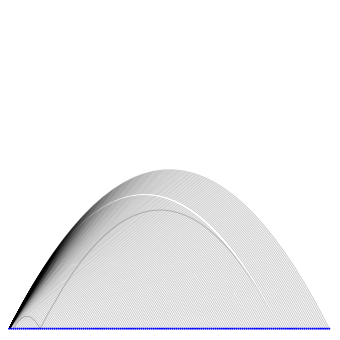

In [ ]:
import networkx as nx
import nxviz as nv

G = nx.from_pandas_edgelist(data, 'sender', 'recipient1', edge_attr=['date', 'subject'])
plot = nv.ArcPlot(G)
plot.draw()
plt.show() 

We can see our nodes (employees) at the bottom and the dominance of the one node on the right side.  517,000 row dataset here, so we are looking at emails from 150 Enron executives contained in the full dataset.

Next we'll bend the ends of this plot and join them together to form a circle, otherwise known as a 

CircosPlot
----------

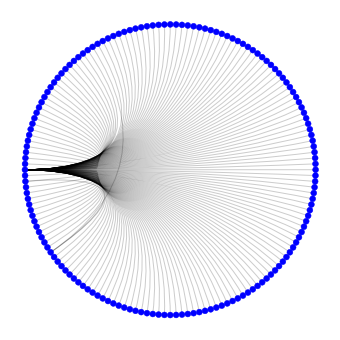

In [ ]:
plot = nv.CircosPlot(G)
plot.draw()
plt.show()

Same deal here, although in my opinion a lot clearer and easier to comprehend.

Still, this leaves a lot to be desired. It just doesn't *look* like what most folks expect from a network graph. So next we will use nxviz to 

Draw the Network
----------------

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


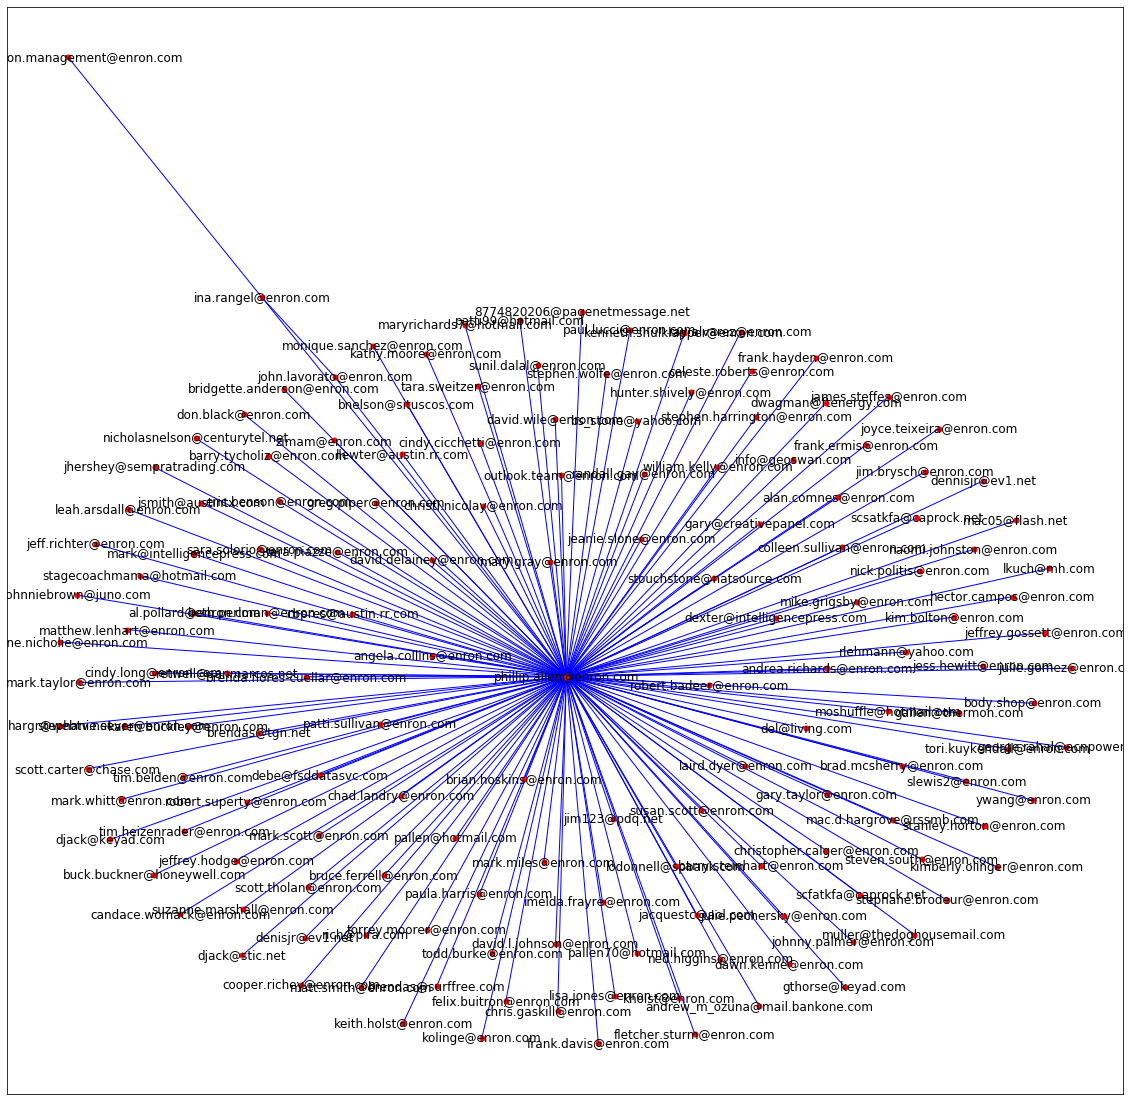

In [ ]:
plt.figure(figsize=(20,20))
pos = nx.spring_layout(G, k=.1)
nx.draw_networkx(G, pos, node_size=25, node_color='red', with_labels=True, edge_color='blue')
plt.show()

We plotted this a few times with different "tension" on the spring layout to show some different options for visualizing this network. We've been finding that it pays to use a small 'k' value and plot these with a large figsize (200 x 200 or larger). This produces a big enough graphic to allow you to really zoom in and examine minor details without getting overwhelmed by the number of labels. Of course, if you choose to turn the labels off with with_labels=False you can avoid that issue, but this is no fun (and not particularly interesting) without the names attached.

Just my opinion.



```
# This is formatted as code
```

Next we can look at degree centrality, which basically measures the extent to which a given node is connected to all the other nodes. 

Degree Centrality
-----------------

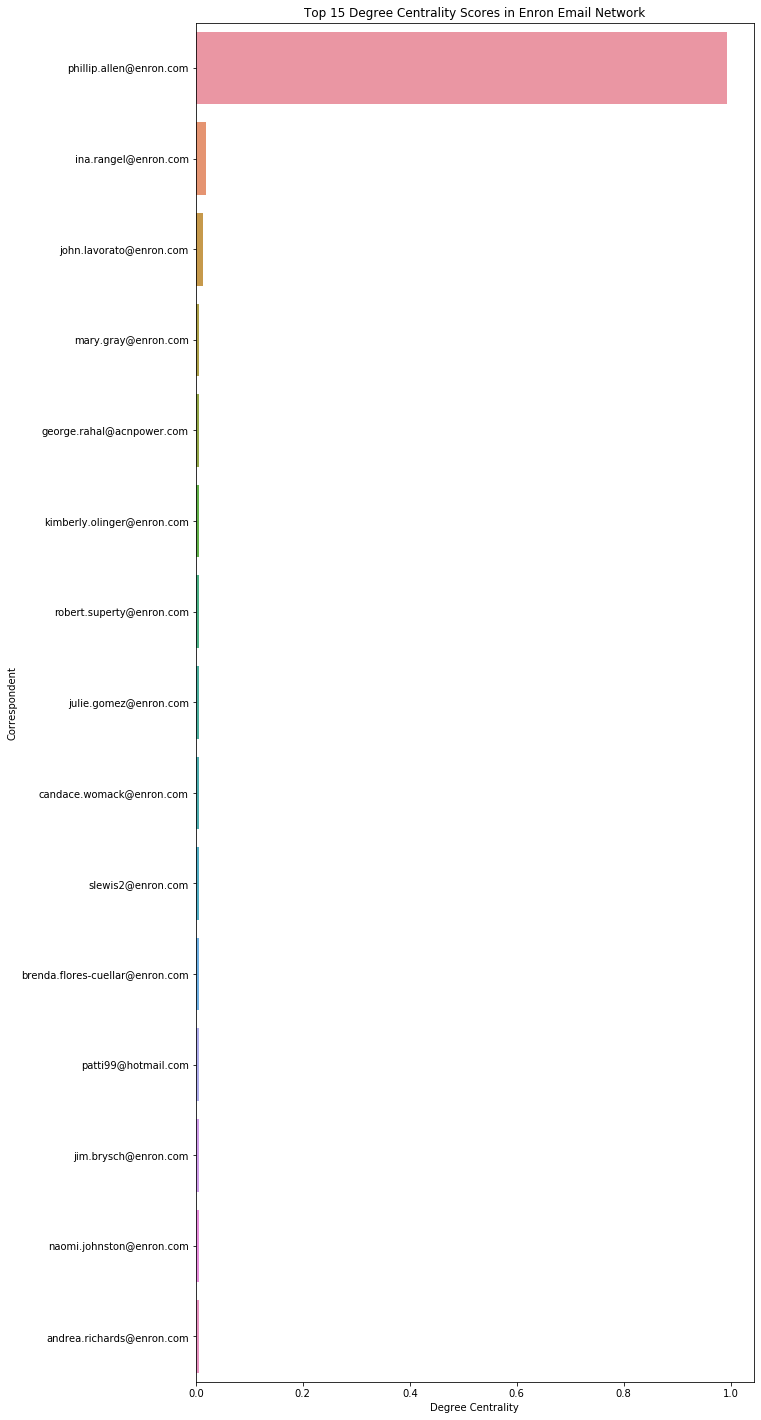

In [ ]:
cent = nx.degree_centrality(G)
name = []
centrality = []

for key, value in cent.items():
    name.append(key)
    centrality.append(value)

cent = pd.DataFrame()    
cent['name'] = name
cent['centrality'] = centrality
cent = cent.sort_values(by='centrality', ascending=False)

plt.figure(figsize=(10, 25))
_ = sns.barplot(x='centrality', y='name', data=cent[:15], orient='h')
_ = plt.xlabel('Degree Centrality')
_ = plt.ylabel('Correspondent')
_ = plt.title('Top 15 Degree Centrality Scores in Enron Email Network')
plt.show()

As you can see, Mr. Allen is connected to everyone. Next we can look at betweenness centrality, which measures the degree to which each node is the 'single point of contact', so to speak, between other nodes or cliques.

Betweenness Centrality
----------------------

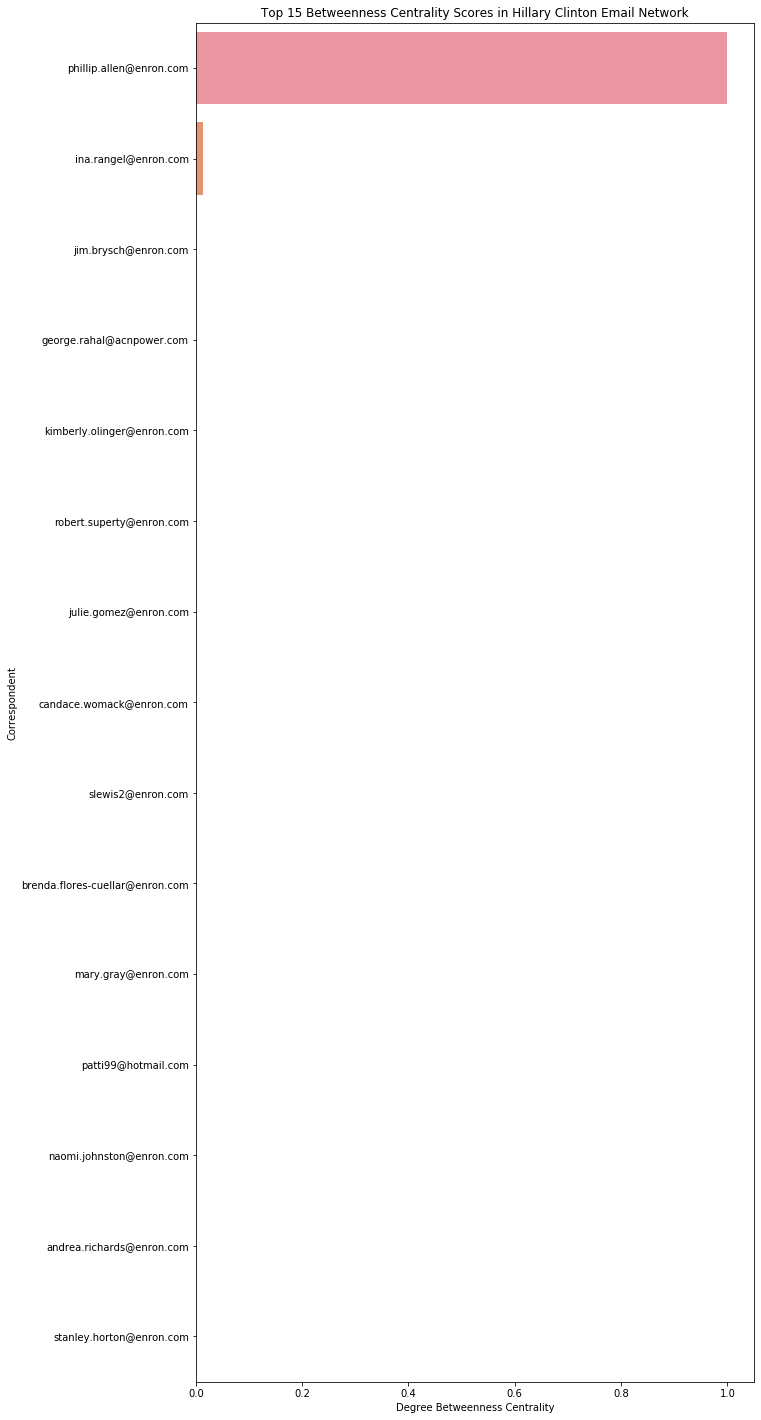

In [ ]:
between = nx.betweenness_centrality(G)
name = []
betweenness = []

for key, value in between.items():
    name.append(key)
    betweenness.append(value)

bet = pd.DataFrame()
bet['name'] = name
bet['betweenness'] = betweenness
bet = bet.sort_values(by='betweenness', ascending=False)


plt.figure(figsize=(10, 25))
_ = sns.barplot(x='betweenness', y='name', data=bet[:15], orient='h')
_ = plt.xlabel('Degree Betweenness Centrality')
_ = plt.ylabel('Correspondent')
_ = plt.title('Top 15 Betweenness Centrality Scores in Hillary Clinton Email Network')
plt.show()